In [1]:
#pip install wordcloud
#pip install textblob
#conda install textblob

In [2]:
### Loading Packages

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator, ImageColorGenerator

import warnings
warnings.filterwarnings("ignore")


In [3]:
### Importing Data

agg_video_data = pd.read_csv('Aggregated_Metrics_By_Video.csv')
country_data = pd.read_csv('Aggregated_Metrics_By_Country_And_Subscriber_Status.csv')
video_time_data = pd.read_csv('Video_Performance_Over_Time.csv')
comments_data = pd.read_csv('All_Comments_Final.csv')

## Exploratory Data Analysis

Exploratory data analysis (EDA) is used to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers we need, making it easier to discover patterns, spot anomalies, test a hypothesis, or check assumptions.

### Who is Ken Jee's core audience and what are they interested in? 

In [4]:
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (15, 10)

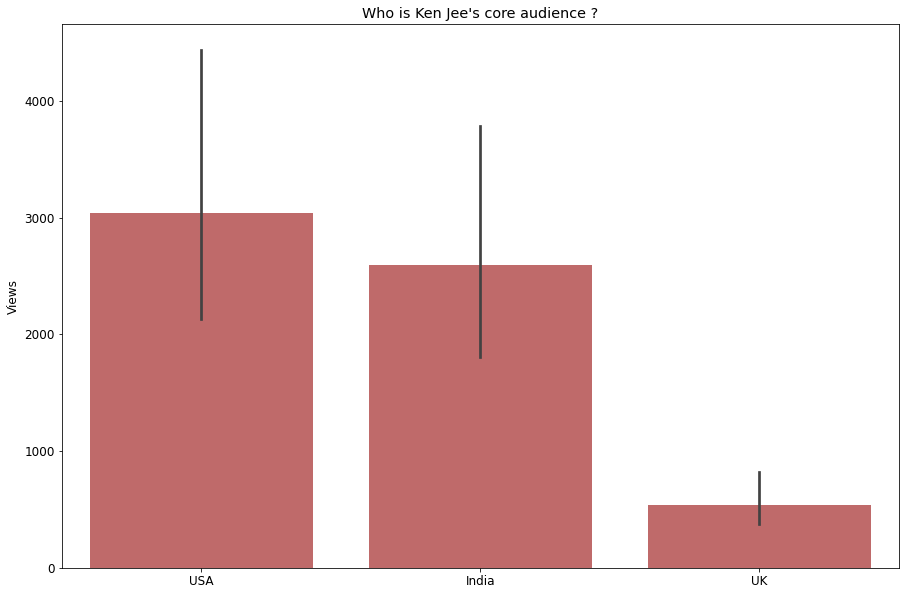

In [5]:
### Audience from top 3 countries
countrywise_views = country_data[['Country Code','Views']].copy().sort_values(by='Views',ascending=False)
countrywise_views.groupby('Country Code').sum().sort_values(by='Views',ascending = False).head(5)

df = country_data[['Video Title','Views','Average Watch Time','Country Code']].copy().sort_values(by='Views',ascending=False)
USA_data = df[df['Country Code'] == 'US']
India_data = df[df['Country Code'] == 'IN']
Britain_data = df[df['Country Code'] == 'GB']
audience = pd.concat([USA_data,India_data,Britain_data], axis = 0, sort= False).sort_values(by='Views', ascending = False)
audience["Country Code"].replace({"US": "USA", "IN": "India","GB":"UK"}, inplace=True)
plt.title("Who is Ken Jee's core audience ?")
plt.xlabel('Views')
ax = sns.barplot(x=audience['Country Code'] , y= audience['Views'], color = "indianred")
plt.xlabel(" ")
plt.show()
#fig.savefig("topViewsCountries.png")

### What are the most prominent comments ?

In [6]:
print('Comments on videos - ', format(len(comments_data['Comments'])))
print('Unique Videos - ', format(comments_data['VidId'].nunique()))
print('Comments per Video -', format(len(comments_data['Comments'])/comments_data['VidId'].nunique()))

Comments on videos -  10240
Unique Videos -  222
Comments per Video - 46.126126126126124


In [7]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
tokenized_words = tokenizer.tokenize((comments_data['Comments']).to_string())

from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

#Most Commented Video
topcommentsdf = pd.pivot_table(comments_data, index = 'VidId', values = 'Comment_ID', aggfunc = 'count').sort_values('Comment_ID', ascending = False)
topcommentsdf.reset_index(inplace=True)
New_df = topcommentsdf.merge(agg_video_data,left_on='VidId', right_on='Video' )
New_df.groupby('Video title').sum().sort_values(by='Comment_ID',ascending= False).reset_index().head(5)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/raunakkapur/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Video title,Comment_ID,Com­ments ad­ded,Shares,Dis­likes,Likes,Sub­scribers lost,Sub­scribers gained,RPM (USD),CPM (USD),Av­er­age per­cent­age viewed (%),Views,Watch time (hours),Sub­scribers,Your es­tim­ated rev­en­ue (USD),Im­pres­sions,Im­pres­sions click-through rate (%)
0,How I Would Learn Data Science (If I Had to St...,797,907,9583,942,46903,451,46904,6.353,12.835,36.65,1253559,65850.7042,46453,7959.533,26498799,3.14
1,The Best Free Data Science Courses Nobody is T...,262,294,4694,75,19464,131,10734,4.097,9.124,33.80,297222,10465.0467,10603,1217.046,4512254,3.24
2,Data Science Certificate vs Bootcamp vs Master...,224,239,456,48,2708,37,1576,8.315,17.543,36.21,92355,9057.2752,1539,767.493,2247912,2.78
3,How I Would Learn Data Science in 2021 (What H...,219,232,741,63,5869,57,3358,7.526,15.786,41.01,123515,7724.2735,3301,929.400,1699309,3.93
4,3 Proven Data Science Projects for Beginners (...,205,220,1935,64,14708,72,9508,3.733,9.247,35.26,237467,10560.3597,9436,885.504,3137644,4.01


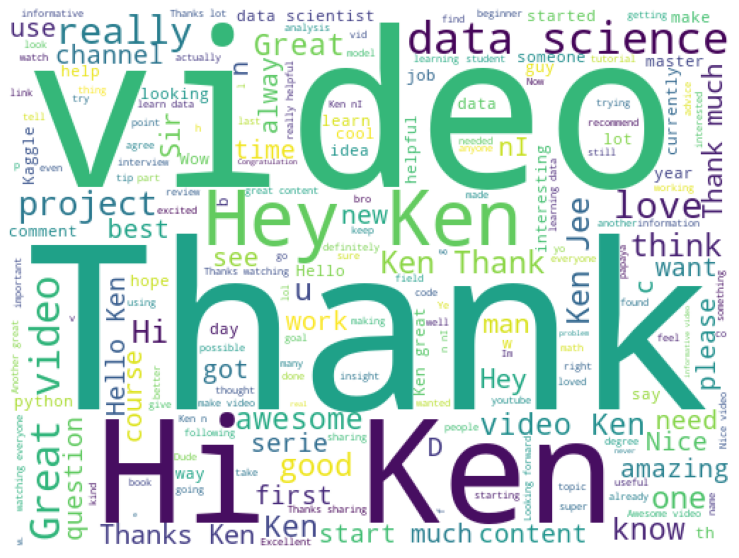

In [8]:
filtered_comments = []
for w in tokenized_words:
    if w not in stop_words:
        filtered_comments.append(w)
#from nltk.probability import FreqDist
#Frequency = FreqDist(filtered_comments)
#Frequency.plot(20,cumulative=False)
wordcloud = WordCloud (background_color = 'white',
                       width = 512,height = 384).generate(' '.join(filtered_comments))
plt.imshow(wordcloud)
plt.axis('off') 
plt.show()
#plt.savefig('wordcloud.png')

### Sentiment Analysis of User comments

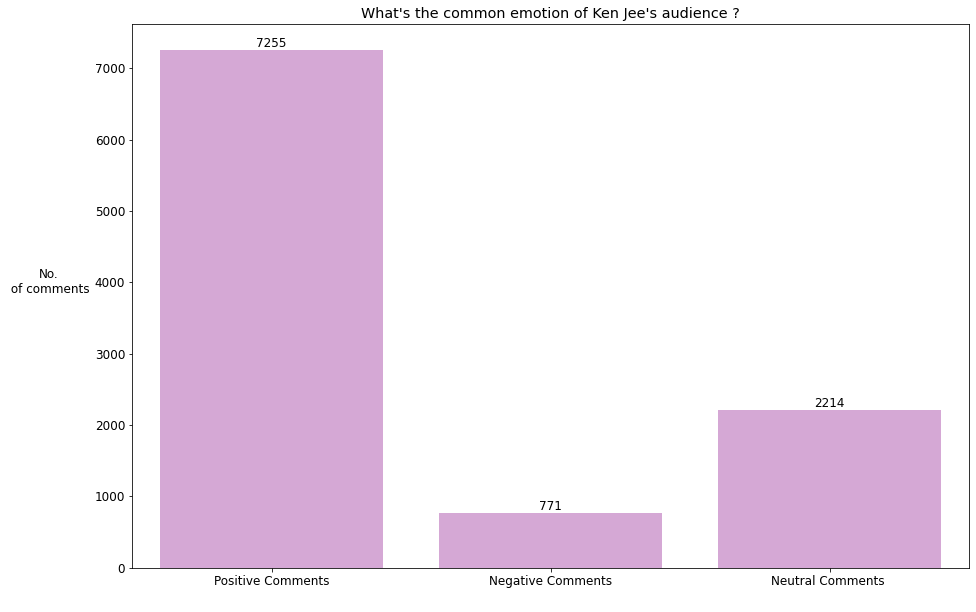

In [9]:
#!pip install textblob
from textblob import TextBlob
### Calculating Sentiment polarity for each comment
pol=[] 
for i in comments_data.Comments.values:
    try:
        analysis =TextBlob(i)
        pol.append(analysis.sentiment.polarity)
        
    except:
        pol.append(0)
        
#Adding the Sentiment Polarity column to the data
comments_data['pol']=pol

#Converting the polarity values from continuous to categorical
comments_data['pol'][comments_data.pol==0]= 0
comments_data['pol'][comments_data.pol > 0]= 1
comments_data['pol'][comments_data.pol < 0]= -1

#Displaying the positive comments
df_positive = comments_data[comments_data.pol==1]
df_positive['score'] = 1
df_positive.head(2)

#Displaying the negative comments
df_negative = comments_data[comments_data.pol==-1]
df_negative['score'] = -1
df_negative.head(2)

#Displaying the neutral Comments
df_neutral = comments_data[comments_data.pol==0]
df_neutral['score'] = 0
df_neutral.head(2)

comments_data["pol"].replace({1.0: "Positive Comments", 0.0: "Neutral Comments ",-1.0:"Negative Comments"}, inplace=True)
plt.title("What's the common emotion of Ken Jee's audience ?")
ax = sns.countplot(x ='pol', data = comments_data, color = "plum")
ax.bar_label(ax.containers[0])
ax.yaxis.set_label_coords(-.1, .5)
plt.xlabel(" ")
plt.ylabel("No.\n of comments")

for ax in plt.gcf().axes:
    plt.sca(ax)
    plt.ylabel(ax.get_ylabel(), rotation=0)
#plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
#plt.ylabel(ax.get_ylabel(), rotation=90)

plt.show()

In [10]:
# append all 3 dataframes
final_df = df_positive.append([df_negative, df_neutral])

#calculating score for each video
final_df.groupby('VidId')['score'].sum().sort_values(ascending = False)
f = final_df.groupby('VidId').sum().sort_values(by='score',ascending = False)
f.drop(columns = ['Reply_Count','Like_Count','pol'], inplace = True)

#calculating count of positive reviews for each video
f_pos = df_positive.groupby('VidId').count().sort_values(by='score',ascending = False)
f_pos.drop(columns = ['Comments','Comment_ID','Date','user_ID','Reply_Count','Like_Count','pol'], inplace = True)
f_pos.rename(columns = {'score':'no. of positive reviews'}, inplace = True)

#calculating count of negative reviews for each video
f_neg = df_negative.groupby('VidId').count().sort_values(by='score',ascending = False)
f_neg.drop(columns = ['Comments','Comment_ID','Date','user_ID','Reply_Count','Like_Count','pol'], inplace = True)
f_neg.rename(columns = {'score':'no. of negative reviews'}, inplace = True)

#calculating count of neutral reviews for each video
f_neut = df_neutral.groupby('VidId').count().sort_values(by='score',ascending = False)
f_neut.drop(columns = ['Comments','Comment_ID','Date','user_ID','Reply_Count','Like_Count','pol'], inplace = True)
f_neut.rename(columns = {'score':'no. of neutral reviews'}, inplace = True)

#merging all datatables
score_pos_df = pd.merge(f,f_pos, how= "left", on = 'VidId')
neg_pos_neut = pd.merge(f_neg,f_neut, how= "left", on = 'VidId')
merged_table = pd.merge(score_pos_df,neg_pos_neut, how= "left", on = 'VidId')

merged_table.head(10)


#video_time_data.rename(columns = {'External Video ID':'VidId'}, inplace = True)
#merged_title = pd.merge(merged_table,video_time_data[['VidId','Video Title']], how= "left", on = 'VidId')
#merged_title.drop_duplicates(keep=False, inplace=True)

,score,no. of positive reviews,no. of negative reviews,no. of neutral reviews
VidId,,,,
4OZip0cgOho,450,512,62.0,223.0
Ip50cXvpWY4,160,175,15.0,72.0
8igH8qZafpo,147,156,9.0,40.0
Q9FjwzKFPuM,145,161,16.0,47.0
41Clrh6nv1s,129,149,20.0,50.0
uXLnbdHMf8w,118,129,11.0,52.0
myhoWUrSP7o,107,114,7.0,20.0
I3FBJdiExcg,100,109,9.0,34.0
sHRq-LshG3U,98,122,24.0,43.0


In [11]:
comments_data

,Comments,Comment_ID,Reply_Count,Like_Count,Date,VidId,user_ID,pol
0,Thanks for this video Ken.\n\nI decided to go ...,UgxFZTIzC4UPyhhX_PZ4AaABAg,0,0,2022-01-22T08:13:29Z,xpIFS6jZbe8,user_981,Positive Comments
1,Hello ken jee!!! I'm doing a graduation on Com...,Ugx3IYuAufhb932GYQx4AaABAg,0,0,2022-01-22T01:09:46Z,xpIFS6jZbe8,user_213,Positive Comments
2,"Thanks for this video, man. So useful. I'll me...",UgyhwwoK24arzRt1mud4AaABAg,0,0,2022-01-21T23:59:05Z,rEWPqw6rMGI,user_1065,Positive Comments
3,Great video!!! I started learning Python 8 mon...,UgwrrI7nd3WClsotmHV4AaABAg,0,0,2022-01-21T23:00:37Z,xpIFS6jZbe8,user_3391,Positive Comments
4,Been watching hours of your material (and Tina...,UgxlOrHO4MHKSwY9mUN4AaABAg,0,0,2022-01-21T20:24:20Z,sHRq-LshG3U,user_2816,Positive Comments
...,...,...,...,...,...,...,...,...
10235,"Dear Ken,\nMay I know how the input data with ...",UgzX5v48CJAPbvynwTR4AaABAg,1,0,2018-07-06T07:08:39Z,qfRhKHV8-t4,user_5850,Neutral Comments
10236,What's your prediction Ken for 2018 or at leas...,UgwdI9ydb2nk-FIJ1sN4AaABAg,0,0,2018-05-15T00:01:12Z,qfRhKHV8-t4,user_2676,Negative Comments
10237,Nice. I have some nice models for this doing v...,UgyTi5fEIpZBoED9Fc94AaABAg,0,0,2018-05-04T20:58:54Z,qfRhKHV8-t4,user_4533,Positive Comments
10238,Great video! Can you please post the github li...,UgyhJTCKn88b0lggR794AaABAg,0,0,2018-02-20T16:46:19Z,qfRhKHV8-t4,user_3368,Positive Comments


In [12]:
#merged_table.to_csv('sentiments.csv')

### What type of content are people engaging with the most ? 

In [13]:
Views_df = video_time_data[['Video Title','External Video ID', 'Views']].copy().sort_values(by='Views',ascending= False)\
.drop_duplicates('Video Title')

Views_df.head(10)

,Video Title,External Video ID,Views
95370,How I Would Learn Data Science (If I Had to St...,4OZip0cgOho,35677
92863,How I Learned Data Science,n3vw0M5RrPU,20341
92878,Reviewing Your Data Science Projects - Episode...,HJH0gfY6EUg,15235
92808,Different Data Science Roles Explained (by a D...,BZFfNwj7JhE,13875
58052,Why I Quit Data Science,SVtRsDhHlDk,12743
92889,The State of Data Science with Krish Naik & Th...,4qZINLzwYyk,12426
4240,How I Would Learn Data Science in 2022 (If I H...,xpIFS6jZbe8,7983
49102,Why You Probably Won't Become a Data Scientist,sHRq-LshG3U,7011
92886,Is Data Science Right For You?,3Mm1U1CbzNw,6744
92892,Reviewing Your Data Science Projects - Episode...,_K6cNdgN3CI,6743


### What are the video titles and thumbnails that drive the most traffic ?

In [14]:
high_watchtime = video_time_data[['Video Title','Thumbnail link', 'Average View Percentage','Average Watch Time']]\
.copy().sort_values(by='Average Watch Time',ascending= False).drop_duplicates('Video Title')

high_watchtime.head(10)



,Video Title,Thumbnail link,Average View Percentage,Average Watch Time
66094,"Ken Jee Q & A Live Stream (50,000 Sub Special!)",https://i.ytimg.com/vi/-3d1NctSv0c/hqdefault.jpg,1.559420,5322.300
39267,100K Channel Update + AMA Stream!,https://i.ytimg.com/vi/78LjdAAw0wA/hqdefault.jpg,0.999805,5028.021
55712,Data Science Explained with ... Cooking?,https://i.ytimg.com/vi/f6NPw582FFc/hqdefault.jpg,8.476340,4517.889
45061,Sports Analytics & Streaming Data Science on T...,https://i.ytimg.com/vi/S_CuB__nsmI/hqdefault.jpg,0.999812,4517.150
104225,Data Science Fundamentals: Data Cleaning in Py...,https://i.ytimg.com/vi/4yI3vVe0Jos/hqdefault.jpg,2.027331,4224.958
11857,I Eat a Papaya Live on Stream (Plus Q&A for 15...,https://i.ytimg.com/vi/143WWA5Sy9k/hqdefault.jpg,0.824455,4126.397
20911,His Startup Will Land You a Data Science Job (...,https://i.ytimg.com/vi/7VcdvSyoxnc/hqdefault.jpg,1.054885,3909.405
13285,The Data Science Interview: What to Expect,https://i.ytimg.com/vi/5SjK6YCs4o4/hqdefault.jpg,4.126801,3656.346
56980,"Data Science Productivity, Motivation, and Org...",https://i.ytimg.com/vi/742LQ38OioU/hqdefault.jpg,1.011048,3531.590
13216,Fast Cars to Faster Data (Alex Castrounis) - K...,https://i.ytimg.com/vi/g7on3Rw0Ovg/hqdefault.jpg,1.000000,3289.000


### What types of videos attract new subscribers ? 

In [15]:
new_subs = agg_video_data[['Video','Video title','Sub­scribers gained' ]].copy().\
sort_values(by='Sub­scribers gained',ascending= False).drop([0])

new_subs.head(10)

,Video,Video title,Sub­scribers gained
1,4OZip0cgOho,How I Would Learn Data Science (If I Had to St...,46904
7,Ip50cXvpWY4,The Best Free Data Science Courses Nobody is T...,10734
13,8igH8qZafpo,3 Proven Data Science Projects for Beginners (...,9508
12,41Clrh6nv1s,How I Would Learn Data Science in 2021 (What H...,3358
41,MpF9HENQjDo,Data Science Project from Scratch - Part 1 (Pr...,3184
29,yukdXV9LR48,The Projects You Should Do To Get A Data Scien...,2793
17,I3FBJdiExcg,Beginner Kaggle Data Science Project Walk-Thro...,2585
32,xpIFS6jZbe8,How I Would Learn Data Science in 2022 (If I H...,2553
37,qV_AlRwhI3I,What is the #66DaysOfData?,2395
15,sHRq-LshG3U,Why You Probably Won't Become a Data Scientist,2237


In [16]:
#df_new.to_csv('topvideos_new_subscribers.csv')
#videos_attracted_more_newsubscribers = agg_video_data[['Video','Video title','Sub­scribers gained' ]].copy().\
#sort_values(by='Sub­scribers gained',ascending= False).drop([0]).head(10)['Video title']

#videos_attracted_more_newsubscribers.to_csv('new_subscribers.csv')

### What types of video titles and thumbnails lead to higher click-through rate? 

In [17]:
videos_highclick = agg_video_data[['Video title','Im­pres­sions click-through rate (%)']]\
.sort_values(by = 'Im­pres­sions click-through rate (%)', ascending = False)

videos_highclick.head(10)

,Video title,Im­pres­sions click-through rate (%)
223,ProjectDemoCSC478_UFCFightData,11.51
20,Why I Quit Data Science,8.62
75,Should You Get A Masters in Data Science?,8.40
21,Scrape Twitter Data in Python with Twitterscra...,7.71
105,Should You Learn R for Data Science?,7.45
56,The Best Computer for Data Science Beginners,7.16
113,What Does a Data Scientist Actually Do?,6.60
10,Data Science Project from Scratch - Part 2 (Da...,6.53
71,Data Science Project from Scratch - Part 7 (Do...,6.18
33,How YOU Can Land a Sports Analytics Job,6.12


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

from sklearn.cluster import KMeans

In [19]:
df = pd.read_csv('All_Comments_Final5.csv',encoding = "utf-8")

In [20]:
df.head(10)

,user,How I Would Learn Data Science (If I Had to Start Over),The Best Free Data Science Courses Nobody is Talking About,Data Science Certificate vs Bootcamp vs Masters Degree,How I Would Learn Data Science in 2021 (What Has Changed?),3 Proven Data Science Projects for Beginners (Kaggle),Data Science Project from Scratch - Part 2 (Data Collection),Why I'm Starting Data Science Over Again.,Why You Probably Won't Become a Data Scientist,Beginner Kaggle Data Science Project Walk-Through (Titanic),...,Where to Look for Data Science Jobs,Golf: Would You Rather Be the LONGEST or STRAIGHTEST Driver on the PGA Tour?,Data Science: Startup vs. Large Corporation,Demystifying Data Science Roles,IT'S NOT TOO LATE TO LEARN CODE!,How To Build A Word Cloud From Scraped Data (Python),Welcome To My Channel | Ken Jee | Data Science,Most Data Science Hopefuls Overlook This Important Skill,NASA Physicist Turned Data Scientist (Tim Bowling) - KNN EP. 02,#66DaysOfData Round 3 Live Event! (feat. @StatQuest with Josh Starmer)
0,user_2385,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1,user_3452,1.0,1.0,NaN,1.0,NaN,NaN,1.0,1.0,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN
2,user_659,1.0,1.0,NaN,1.0,1.0,NaN,1.0,1.0,NaN,...,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,user_1178,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,user_77,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
5,user_3451,1.0,1.0,NaN,1.0,1.0,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,user_4187,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,user_1889,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,user_830,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,user_4607,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
C1 = df.columns.tolist()
print(C1)

['user', 'How I Would Learn Data Science (If I Had to Start Over)', 'The Best Free Data Science Courses Nobody is Talking About', 'Data Science Certificate vs Bootcamp vs Masters Degree', 'How I Would Learn Data Science in 2021 (What Has Changed?)', '3 Proven Data Science Projects for Beginners (Kaggle)', 'Data Science Project from Scratch - Part 2 (Data Collection)', "Why I'm Starting Data Science Over Again.", "Why You Probably Won't Become a Data Scientist", 'Beginner Kaggle Data Science Project Walk-Through (Titanic)', 'Why I Quit Data Science', 'Building a Deep Learning BEAST (NVIDIA TITAN RTX + RYZEN 3900X)', 'I Built the FIRST EVER YouTube Subscriber LEADERBOARD', 'Scrape Twitter Data in Python with Twitterscraper Module', 'Is Data Science Dying?', '5 Essential Data Science Projects for Your Portfolio', 'Data Science Project from Scratch - Part 3 (Data Cleaning)', 'How to Build a Data Science Portfolio Website with Hugo & Github Pages [feat. Data Professor]', 'The Projects You S

### Frequent Pattern Mining

<b>1. Reading the dataset</b>

In [22]:
consumers_num = 10
products_num = 222

def read_data(consumption_table):
    comsumptions = {}
    dat = []
    for index in consumption_table.index:
        pconsumption = consumption_table.loc[index]

        consumer = pconsumption['user']
        products = pconsumption[1:221]

        product_ids = []
        for item in list(products.items()):
            if item[1] == 1:
                product_ids.append(item[0])

        comsumptions[consumer] = product_ids
        dat.append(product_ids)

    return comsumptions, dat

In [23]:
usersdetails,data=read_data(df)
data

[['How I Would Learn Data Science (If I Had to Start Over)',
  'The Best Free Data Science Courses Nobody is Talking About',
  'Data Science Certificate vs Bootcamp vs Masters Degree',
  'How I Would Learn Data Science in 2021 (What Has Changed?)',
  '3 Proven Data Science Projects for Beginners (Kaggle)',
  'Data Science Project from Scratch - Part 2 (Data Collection)',
  "Why I'm Starting Data Science Over Again.",
  "Why You Probably Won't Become a Data Scientist",
  'Beginner Kaggle Data Science Project Walk-Through (Titanic)',
  'Why I Quit Data Science',
  'Building a Deep Learning BEAST (NVIDIA TITAN RTX + RYZEN 3900X)',
  'I Built the FIRST EVER YouTube Subscriber LEADERBOARD',
  'Scrape Twitter Data in Python with Twitterscraper Module',
  'Is Data Science Dying?',
  '5 Essential Data Science Projects for Your Portfolio',
  'Data Science Project from Scratch - Part 3 (Data Cleaning)',
  'How to Build a Data Science Portfolio Website with Hugo & Github Pages [feat. Data Profess

#### 1. Apriori Algorithm

In [24]:
def createC1(dataset):
    C1 = []
    for transaction in dataset:
        for item in transaction:
            if [item] not in C1:
                C1.append([item])
    C1.sort()
    return list(map(frozenset, C1))

In [25]:
def scanD(D, Ck, minSupport):
    ssCnt = {}
    for tid in D:
        for can in Ck:
            if can.issubset(tid):
                ssCnt[can] = ssCnt.get(can, 0) + 1
    numTrans = float(len(D))
    retList = []
    supportData = {}
    for key in ssCnt:
        support = ssCnt[key] / numTrans

        if support >= minSupport:
            retList.insert(0, key)

        supportData[key] = support
    return retList, supportData

In [26]:
def aprioriGen(Lk, k):
    retList = []
    lenLk = len(Lk)
    for i in range(lenLk):
        for j in range(i + 1, lenLk):
            L1 = list(Lk[i])[: k - 2]
            L2 = list(Lk[j])[: k - 2]
            L1.sort()
            L2.sort()
            if L1 == L2:
                retList.append(Lk[i] | Lk[j])
    return retList

In [27]:
def apriori(dataset, minSupport=0.5):
    # Initial
    C1 = createC1(dataset)
    D = list(map(set, dataset))

    # Initial frequent itemsets, containing one element
    L1, suppData = scanD(D, C1, minSupport)
    L = [L1]

    # One element -> more elements
    k = 2

    while (len(L[k - 2]) > 0):
        Ck = aprioriGen(L[k - 2], k)
        Lk, supK = scanD(D, Ck, minSupport)

        suppData.update(supK)
        L.append(Lk)
        k += 1
    return L, suppData

In [28]:
L, suppData = apriori(data, 0.07)
print("Frequent itemsets:")
for i in L:
    if i!=[]:
        print()
        print("{}-itemset".format(L.index(i)+1))
        print()
        for j in i:
            print(list(j))
#print("Frequent itemsets:", L)

print()
print("Support of each itemset:")
for k in suppData.keys():
    print(list(k),"Support: ",suppData[k] )
#print("Support:", suppData)


Frequent itemsets:

1-itemset

['The YouTube Algorithm EXPLAINED! (Tips from a Data Scientist)']
['What is Pandas? (Data & Data Science) #shorts']
['Math Needed for Mastering Data Science']
['#66DaysOfData - What is it? #shorts']
['🌶 Hot Topics in Tech: Data Science Explained #SHORTS']
['git for Data Science Made Simple... (Hopefully)']
["Why You're Struggling to Learn Data Science"]
["Why You Probably Won't Become a Data Scientist"]
['Why Is Data Engineering So HOT Right Now?']
["Why I'm Starting Data Science Over Again."]
['Why I Quit Data Science']
['Why I Have 2 Offices for Data Science & Content Creation']
['What is the Future of my Comment Leaderboard Project?']
['What is the #66DaysOfData?']
['We Need to Talk About The LinkedIn Machine Learning Assessment.']
['Unboxing the Ultimate Z by HP Data Science Package (FIRST EVER HP Workstation w/ Data Science Stack)']
['Uber Driver to Machine Learning Engineer in 9 Months! (@Daniel Bourke) - KNN EP. 05']
['The TRUTH About My First Data

["Why You're Struggling to Learn Data Science", 'Different Data Science Roles Explained (by a Data Scientist)'] Support:  0.030042918454935622
["Why You're Struggling to Learn Data Science", 'Dealing with Doubt in Data Science (My Impostor Syndrome Story)'] Support:  0.017167381974248927
["Why You're Struggling to Learn Data Science", 'Data Scientist Reacts: REAL Data Science Job Application Data'] Support:  0.012875536480686695
["Why You're Struggling to Learn Data Science", 'Data Science Resume Round-Up With @Tina Huang  - Episode 1'] Support:  0.02145922746781116
["Why You're Struggling to Learn Data Science", 'Data Science Project from Scratch - Part 3 (Data Cleaning)'] Support:  0.012875536480686695
["Why You're Struggling to Learn Data Science", 'Data Science Project from Scratch - Part 2 (Data Collection)'] Support:  0.012875536480686695
['Data Science Certificate vs Bootcamp vs Masters Degree', "Why You're Struggling to Learn Data Science"] Support:  0.008583690987124463
['Buil

['The 5 Pillars of Success I Live By', 'What is the Future of my Comment Leaderboard Project?'] Support:  0.017167381974248927
['Sh*t Data Scientists Say (Parody)', 'What is the Future of my Comment Leaderboard Project?'] Support:  0.02145922746781116
['What is the Future of my Comment Leaderboard Project?', 'Reviewing Your Data Science Projects - Episode 13 (BONUS LinkedIn Review)'] Support:  0.008583690987124463
['My Regrets as a Data Science Student', 'What is the Future of my Comment Leaderboard Project?'] Support:  0.04721030042918455
['My Daily Battle With Time - Will I Win? [Vlog]', 'What is the Future of my Comment Leaderboard Project?'] Support:  0.04721030042918455
['What is the Future of my Comment Leaderboard Project?', 'MARCH MADNESS - Will My Machine Learning Model Beat Your Bracket?'] Support:  0.04721030042918455
['What is the Future of my Comment Leaderboard Project?', 'Kaggle vs Github - Which is Best for Your Data Science Portfolio?'] Support:  0.04291845493562232
['

["How I Learn Data Science Through Studying Other People's Code | #66DaysOfData", 'The Only Data Science Explanation You Need'] Support:  0.012875536480686695
['The Only Data Science Explanation You Need', 'How I Chose My Masters Degree for Breaking into Data Science'] Support:  0.017167381974248927
['The Only Data Science Explanation You Need', 'How I Balance Data Science and Content Creation (7 Secrets)'] Support:  0.04721030042918455
['The Only Data Science Explanation You Need', 'How Data Science Projects Pay Off'] Support:  0.034334763948497854
['The Only Data Science Explanation You Need', 'Find a Data Science Project With These 3 Techniques'] Support:  0.030042918454935622
['The Only Data Science Explanation You Need', "Don't Buy My Course.."] Support:  0.017167381974248927
['The Only Data Science Explanation You Need', 'Discouraged with Data Science? - Watch THIS video.'] Support:  0.034334763948497854
['The Only Data Science Explanation You Need', 'Different Data Science Roles

['My Daily Battle With Time - Will I Win? [Vlog]', '6 Lessons from #66DaysOfData'] Support:  0.030042918454935622
['My Daily Battle With Time - Will I Win? [Vlog]', '5 Unusual Data Science Projects that Will Land You a Job'] Support:  0.02575107296137339
['My Daily Battle With Time - Will I Win? [Vlog]', '5 Proven Strategies to Break into a Data Science Job'] Support:  0.030042918454935622
['My Daily Battle With Time - Will I Win? [Vlog]', '5 Essential Data Science Projects for Your Portfolio'] Support:  0.02575107296137339
['3 Proven Data Science Projects for Beginners (Kaggle)', 'My Daily Battle With Time - Will I Win? [Vlog]'] Support:  0.012875536480686695
['My Daily Battle With Time - Will I Win? [Vlog]', '10000 Subscriber and 100th Video Special (Data Science)'] Support:  0.008583690987124463
['MARCH MADNESS - Will My Machine Learning Model Beat Your Bracket?', 'Kaggle vs Github - Which is Best for Your Data Science Portfolio?'] Support:  0.04291845493562232
['Kaggle Project From

['6 Lessons from #66DaysOfData', 'How to ULTRALEARN Data Science'] Support:  0.02145922746781116
['5 Unusual Data Science Projects that Will Land You a Job', 'How to ULTRALEARN Data Science'] Support:  0.012875536480686695
['5 Proven Strategies to Break into a Data Science Job', 'How to ULTRALEARN Data Science'] Support:  0.017167381974248927
['5 Essential Data Science Projects for Your Portfolio', 'How to ULTRALEARN Data Science'] Support:  0.02145922746781116
['3 Proven Data Science Projects for Beginners (Kaggle)', 'How to ULTRALEARN Data Science'] Support:  0.017167381974248927
['10000 Subscriber and 100th Video Special (Data Science)', 'How to ULTRALEARN Data Science'] Support:  0.012875536480686695
['How to Go From Data Analyst to Data Scientist', 'How to Make A Data Science Portfolio Website with Github Pages'] Support:  0.012875536480686695
['How a Subscriber Landed a Data Analyst Job in Less Than a Year (Ray Ojel) - KNN EP. 09', 'How to Make A Data Science Portfolio Website wi

['Data Science Certificate vs Bootcamp vs Masters Degree', 'How Data Science Projects Pay Off'] Support:  0.008583690987124463
['Building a Deep Learning BEAST (NVIDIA TITAN RTX + RYZEN 3900X)', 'How Data Science Projects Pay Off'] Support:  0.017167381974248927
['Beginner Kaggle Data Science Project Walk-Through (Titanic)', 'How Data Science Projects Pay Off'] Support:  0.02145922746781116
['7 Things to Look For in a Masters For Data Science (feat. @Tina Huang)', 'How Data Science Projects Pay Off'] Support:  0.03862660944206009
['How Data Science Projects Pay Off', '7 Incredible Books That Transformed My Health and My Life'] Support:  0.03862660944206009
['6 Lessons from #66DaysOfData', 'How Data Science Projects Pay Off'] Support:  0.02575107296137339
['5 Unusual Data Science Projects that Will Land You a Job', 'How Data Science Projects Pay Off'] Support:  0.012875536480686695
['How Data Science Projects Pay Off', '5 Proven Strategies to Break into a Data Science Job'] Support:  0.

['#66DaysOfData - What is it? #shorts', 'The 7 Biggest Data Science  Beginner Mistakes'] Support:  0.04721030042918455
['Sh*t Data Scientists Say (Parody)', '#66DaysOfData - What is it? #shorts'] Support:  0.012875536480686695
['My Regrets as a Data Science Student', '#66DaysOfData - What is it? #shorts'] Support:  0.030042918454935622
['My Daily Battle With Time - Will I Win? [Vlog]', '#66DaysOfData - What is it? #shorts'] Support:  0.030042918454935622
['#66DaysOfData - What is it? #shorts', 'MARCH MADNESS - Will My Machine Learning Model Beat Your Bracket?'] Support:  0.034334763948497854
['#66DaysOfData - What is it? #shorts', 'Kaggle vs Github - Which is Best for Your Data Science Portfolio?'] Support:  0.04721030042918455
['Kaggle Project From Scratch - Part 2 (Exploratory Data Analysis)', '#66DaysOfData - What is it? #shorts'] Support:  0.02145922746781116
['Kaggle Project From Scratch - Part 1 (Data Science Profession Survey)', '#66DaysOfData - What is it? #shorts'] Support:  0

#### Closed frequency

In [29]:
def closeditemset(D,suppData,S,minSupport):
    #print("firstlayer")
    #print(S)
    
    ssCnt = {}
    for tid in D:
        for x in S:
            for can in x:
                if can.issubset(tid):
                    ssCnt[can] = ssCnt.get(can, 0) + 1
    numTrans = float(len(D))
    retList = []
    supportData = {}
    for key in ssCnt:
        support = ssCnt[key] / numTrans

        if support >= minSupport:
            retList.insert(0, key)

            supportData[key] = support
    
    supportData.update(suppData)
    #print("Checking keys: ")
    #print(supportData[frozenset({'d', 'f', 'c'})])
    #print(retList,supportData)
    F=[]
    for layer in S:
        closeditems=[]
        closeditems=layer.copy()
        #print(closeditems)
        for eachelement in layer:
            #print("*****each element: *******")
            #print(eachelement)
            for eachSuperset in retList:
                #print("each Superset")
                #print(eachSuperset)
                if eachelement.issubset(eachSuperset) and eachelement !=eachSuperset:
                    #print("is a subset")
                    if supportData[eachSuperset]==supportData[eachelement]:
                        #print("-------Same support count---------")
                        closeditems.remove(eachelement)
                        break
        F.append(closeditems)        
    
    return F
    

In [30]:
ClosedItems=[]
FrequentItemset=[]
suppDataAll={}

FrequentItemset,suppDataAll=apriori(data,0.07)
#print(currentlayer)
#FrequentItemset.append(currentlayer[0])
#suppDataAll.update(suppData)
    
#print(FrequentItemset,suppDataAll)
#SS=superset(currentlayer) 
D=createC1(data)
ClosedItems=closeditemset(D,suppDataAll,FrequentItemset,0.4)
for i in ClosedItems:
    if i != []:
        print()
        print("{}-itemset".format(ClosedItems.index(i)+1))
        print()
        for x in i:
            print (list(x))




1-itemset

['The YouTube Algorithm EXPLAINED! (Tips from a Data Scientist)']
['What is Pandas? (Data & Data Science) #shorts']
['Math Needed for Mastering Data Science']
['#66DaysOfData - What is it? #shorts']
['🌶 Hot Topics in Tech: Data Science Explained #SHORTS']
['git for Data Science Made Simple... (Hopefully)']
["Why You're Struggling to Learn Data Science"]
["Why You Probably Won't Become a Data Scientist"]
['Why Is Data Engineering So HOT Right Now?']
["Why I'm Starting Data Science Over Again."]
['Why I Quit Data Science']
['Why I Have 2 Offices for Data Science & Content Creation']
['What is the Future of my Comment Leaderboard Project?']
['What is the #66DaysOfData?']
['We Need to Talk About The LinkedIn Machine Learning Assessment.']
['Unboxing the Ultimate Z by HP Data Science Package (FIRST EVER HP Workstation w/ Data Science Stack)']
['Uber Driver to Machine Learning Engineer in 9 Months! (@Daniel Bourke) - KNN EP. 05']
['The TRUTH About My First Data Science Project']


#### Maximal

In [31]:
def maximal(ClosedItems):
    notmaximal=[]
    maximal=[]
    Flattenedlist=[items for lists in ClosedItems for items in lists]
    #print(Flattenedlist)
    for layer in ClosedItems:
        for eachelement in layer:
            for immediatesubset in Flattenedlist:
                if eachelement.issubset(immediatesubset) and eachelement !=immediatesubset:
                    if eachelement not in notmaximal:
                        notmaximal.append(eachelement)
    
    for eachelement in Flattenedlist:
        if eachelement not in notmaximal:
            maximal.append(eachelement)
    
    return maximal

In [32]:
m=maximal(ClosedItems)
for i in m:
    print(list(i))

['The YouTube Algorithm EXPLAINED! (Tips from a Data Scientist)']
['What is Pandas? (Data & Data Science) #shorts']
['Math Needed for Mastering Data Science']
['#66DaysOfData - What is it? #shorts']
['🌶 Hot Topics in Tech: Data Science Explained #SHORTS']
["Why You're Struggling to Learn Data Science"]
['Why Is Data Engineering So HOT Right Now?']
["Why I'm Starting Data Science Over Again."]
['Why I Quit Data Science']
['What is the Future of my Comment Leaderboard Project?']
['We Need to Talk About The LinkedIn Machine Learning Assessment.']
['Uber Driver to Machine Learning Engineer in 9 Months! (@Daniel Bourke) - KNN EP. 05']
['The TRUTH About My First Data Science Project']
['The State of Data Science with Krish Naik & The Data Professor [Panel Discussion]']
["The Secret Data Scientists Don't Want You to Know"]
['The Plagiarism Problem in Data Science']
['The Only Data Science Explanation You Need']
['The Best Computer for Data Science Beginners']
['The 5 Pillars of Success I Live

#### Confidence

In [33]:
def generateRules(L, supportData, minConf=0.5):
    '''
    L(frozenset): itemsets
    supportData(dic): all support
    minConf(float): minimum confidence
    '''
    #print(len(L))
    bigRuleList = [] # Store all association rules
    for i in range(1, len(L)): # Obtain len(itemset)>=2
        for freqSet in L[i]: # Traverse
            H1 = [frozenset([item]) for item in freqSet] #Create list containing one element
            if i > 1: # Merge if len(itemset) > 2
                #print("1")
                rulesFromConseq(freqSet, H1, supportData, bigRuleList, minConf)
            else:
                #print("2")
                calcConf(freqSet, H1, supportData, bigRuleList, minConf)
    return bigRuleList

In [34]:
def rulesFromConseq(freqSet, H, supportData, brl, minConf=0.5):
    '''
    freqSet(frozenset): itemsets
    H(frozenset): all elements in the itemsets
    supportData(dic): all support
    brl(tuple): all association satisfying the confidence
    minConf(float): minimum confidence
    '''
    m = len(H[0])
    if len(freqSet) > m + 1:
        Hmp1 = aprioriGen(H, m + 1)
        Hmp1 = calcConf(freqSet, Hmp1, supportData, brl, minConf)
        if len(Hmp1) > 1: # if number of association rules > 1, recursive, combination
            rulesFromConseq(freqSet, Hmp1, supportData, brl, minConf)

In [35]:
def calcConf(freqSet, H, supportData, brl, minConf=0.5):
    '''
    freqSet(frozenset): itemsets
    H(frozenset): all elements in the itemsets
    supportData(dic): all support
    brl(tuple): all association satisfying the confidence
    minConf(float): minimum confidence
    '''
    prunedH = []
    for conseq in H:
        conf = supportData[freqSet] / supportData[freqSet - conseq] # Calculation of confidence
        if conf >=minConf:
            
            print(list(freqSet - conseq), '-->', list(conseq), 'conf:', conf)
            brl.append((freqSet - conseq, conseq, conf))
            prunedH.append(conseq)
    return prunedH

In [36]:
L, suppData = apriori(data, 0.07)
#print(L[1])
rules = generateRules(L, suppData, minConf=0.5)
print()

['How I Use Data to Optimize My Life | What I Collect & How I Analyze It'] --> ['Discouraged with Data Science? - Watch THIS video.'] conf: 0.6428571428571429
['Discouraged with Data Science? - Watch THIS video.'] --> ['How I Use Data to Optimize My Life | What I Collect & How I Analyze It'] conf: 0.5625
['How I Balance Data Science and Content Creation (7 Secrets)'] --> ['How I Would Learn Data Science in 2021 (What Has Changed?)'] conf: 0.5142857142857143
['7 Things to Look For in a Masters For Data Science (feat. @Tina Huang)'] --> ['I Built the FIRST EVER YouTube Subscriber LEADERBOARD'] conf: 0.8095238095238095
['Find a Data Science Project With These 3 Techniques'] --> ['I Built the FIRST EVER YouTube Subscriber LEADERBOARD'] conf: 0.6923076923076923
['How I Balance Data Science and Content Creation (7 Secrets)'] --> ['I Built the FIRST EVER YouTube Subscriber LEADERBOARD'] conf: 0.6285714285714286
['I Built the FIRST EVER YouTube Subscriber LEADERBOARD'] --> ['How I Would Learn 

## next upload advise
**1. first look at other data science channels in the market**  

In [37]:
# load libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set()


pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)


In [39]:
# load data
#video = pd.read_csv(r'Data/Aggregated_Metrics_By_Video.csv')
market = pd.read_csv(r'data-science-youtube-channel-videos-metadata.csv')

In [40]:
market.dropna(inplace=True)
market.reset_index(drop=True, inplace=True)
market['channelTitle'].nunique()

39

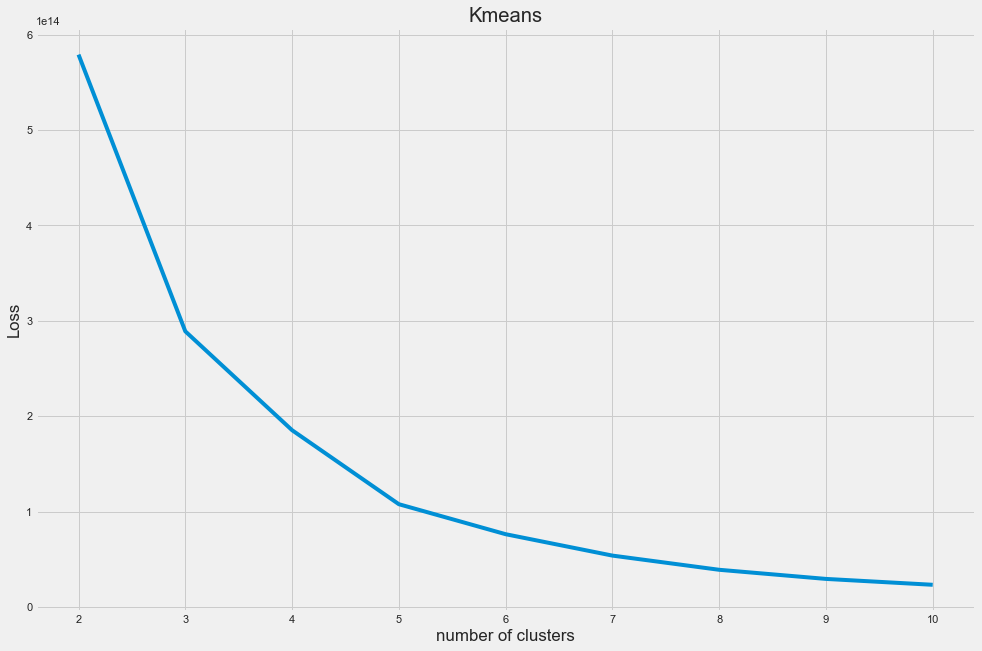

In [41]:
# cluster-> use views, likes and comments 

X = market[['viewCount', 'likeCount', 'commentCount']]
#features.dropna(inplace=True)

N = range(2,11)
score = []
for n in N:
    model = KMeans(n_clusters= n, 
                  max_iter= 200,
                  n_init = 10)
    model = model.fit(X)
    score.append(model.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(N, score)
plt.xlabel('number of clusters')
plt.ylabel('Loss')
plt.title('Kmeans')
plt.show()
    
# optimal number of clusters is 5

In [42]:
# cluster the videos 

km = KMeans(
    n_clusters=5, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=2022
)
cluster = km.fit_predict(X)

In [43]:
# merge clustered results back to main data
market= pd.concat([market, pd.DataFrame(cluster)], axis=1)
market.rename(columns= {0: 'cluster'}, inplace= True)
market

,channelId,channelTitle,videoId,publishedAt,publishedAtSQL,videoTitle,videoDescription,videoCategoryId,videoCategoryLabel,duration,durationSec,dimension,definition,caption,thumbnail_maxres,licensedContent,viewCount,likeCount,dislikeCount,favoriteCount,commentCount,cluster
0,UCkndrGoNpUDV-uia6a9jwVg,ExcelIsFun,cAulba1FL8I,2020-07-11T00:12:56Z,11/7/20 0:12,Power Query & DAX Formulas for Advanced Data Modeling to Sort Slicer by PivotTable Values. EMT1678.,"Download Start Excel File: http://excelisfun.net/files/EMT1678Start.xlsm Download Finished Excel File: http://excelisfun.net/files/EMT1678Finished.xlsm Learn how to build a data model with Power Query and DAX Formulas to force a Slicer to Sort by the PivotTable Values. Topics: 1. (00:00) Introduction. 2. (01:00) Concept for Data Model 3. (01:26) Power Query to create Dimension Table and Index Columns, then load to Power Pivot Data Model. See Add Index Column and Merge feature. 4. (03:07) Add Sort Table From Excel to the Data Model. 5. (03:13) Create Automatic Date Table. 6. (03:32) Create Relationships. 7. (03:45) Create Measure with SUM Function. 8. (04:11) Discuss Aggregate Formula vs. Measure & Filter Context.. 9. (04:50) Add Key to Dimension Table to avoid Circular Dependency using Table Properties. 10. (05:09) Create DAX Calculated Column using: a Measure, and Aggregate SUM Function, IF Function, VALUES Function. 11. (05:20) Discuss Content Transition to allow Filter Content into Measure in a Calculated Column. 12. (05:43) Example of Aggregate Function with NO Filter Context. 13. (05:55) Discuss how to get formula to contain two numbers to sort in opposite directions. 14. (07:48) Sort By Feature. 15. (08:20) Create PivotTables and Add Slicer. 16. (09:14) Test. 17. (09:30) Edit Dax Calculated Column. 18. (10:05) Add VBA code to update automatically. 19. (11:06) Summary. 20. (11:39) End Video Links",27.0,Education,PT11M50S,710.0,2d,hd,False,https://i.ytimg.com/vi/cAulba1FL8I/maxresdefault.jpg,1.0,9407.0,443.0,3.0,0.0,88.0,2
1,UCkndrGoNpUDV-uia6a9jwVg,ExcelIsFun,v14i4qSmZTo,2020-05-16T19:43:43Z,16/5/20 19:43,Double OR Logical Tests in SUMIFS Function using FILTER or IF or MMULT. Excel Magic Trick 1669.,"Download Excel File: https://excelisfun.net/files/EMT1669.xlsx Learn how to summarize Book Author Sales Units when there are multiple authors for each book and only Book ID in the Sales Table, not Author ID. Learn how to create OR Logical Tests in a number of different ways. Learn how to use FILTER, IF and MMULT to create the OR Logical Test Criteria inside the SUMIFS Function. Topics: 1. (00:01) Introduction and Overview of logic for formula 2. (01:00) Formula #1: FILTER, SUMIFS, SUM and Direct Array OR Logical Test calculations. 3. (04:19) Formula #2: IF , SUMIFS, SUMPRODUCT and Direct Array OR Logical Test calculations. 4. (05:03) Formula #3: FILTER, MMULT, COLUMN, SUMIFS, SUM and Direct Array OR Logical Test calculations. 5. (05:39) Summary and End Video Links",27.0,Education,PT6M8S,368.0,2d,hd,False,https://i.ytimg.com/vi/v14i4qSmZTo/maxresdefault.jpg,1.0,10060.0,527.0,3.0,0.0,115.0,2
2,UCkndrGoNpUDV-uia6a9jwVg,ExcelIsFun,lHLPOO6UQDE,2020-05-09T21:17:19Z,9/5/20 21:17,Combine Two Excel Files Into PivotTable Report - Excel Magic Trick 1667,"Download Excel Start File: https://excelisfun.net/files/EMT1667Start.xlsx Download Data: https://excelisfun.net/files/EMT1667Files.zip Download Excel https://excelisfun.net/files/EMT1667Finished.xlsx Learn how to Import data from two different Excel Files directly into a PivotTable Report. Topics: 1. (00:01) Introduction. 2. (00:13) Why we want to use 2 separate Load Only Imports, rather than From Folder feature. 3. (00:43) Look at Data Sets. 4. (00:59) Look at Finished Report. 5. (01:22) Problem with Copy and Paste. 6. (01:51) Import File 1. 7. (02:33) Verify Column Names and Column Data Types. 8. (03:35) Load as “Only Create Connection”. 9. (03:59) Repeat Steps for File 2. 10. (04:14) Combine Two Tables into One Table. Also knows as Ap

In [44]:
market['cluster'].value_counts()

2    12108
1      494
3       78
4       19
0        9
Name: cluster, dtype: int64

In [45]:
market.groupby(['cluster'])['viewCount'].median()

cluster
0    7841739.0
1     379507.0
2       5839.5
3    1652374.0
4    4163114.0
Name: viewCount, dtype: float64

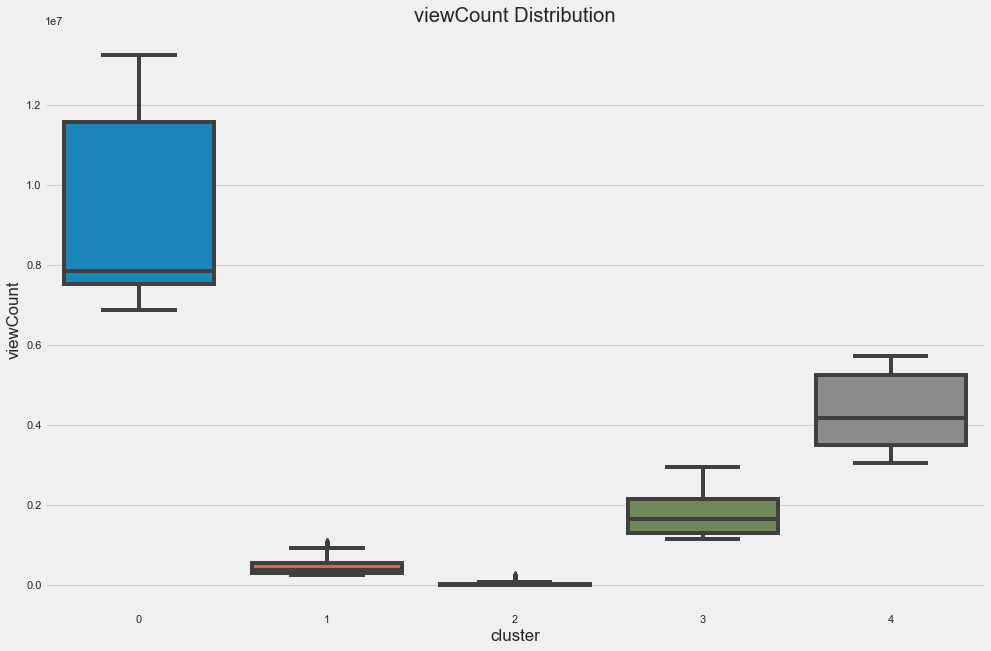

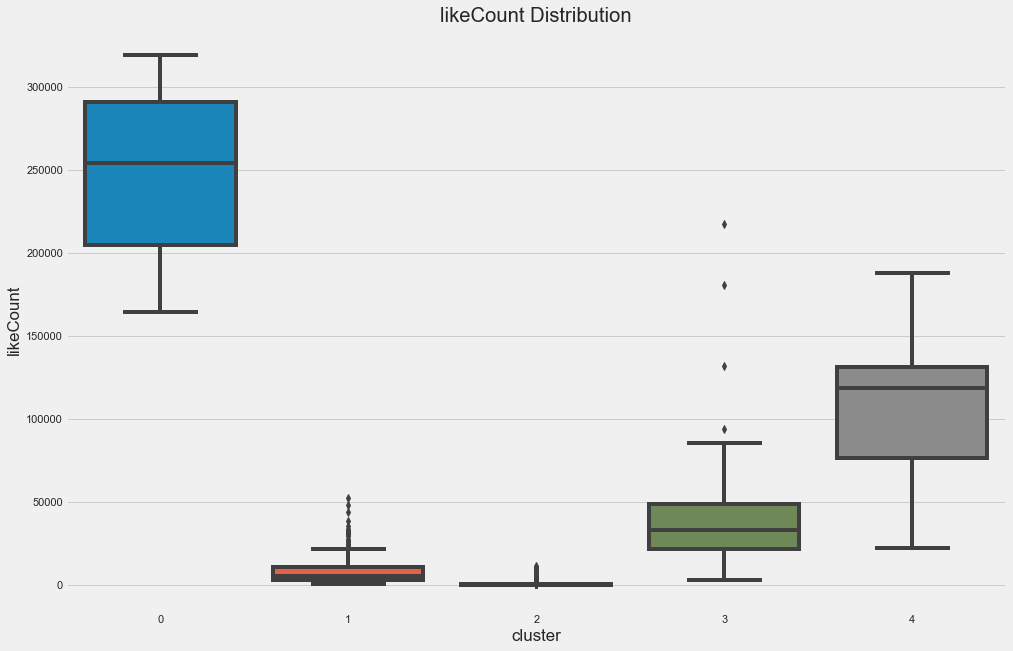

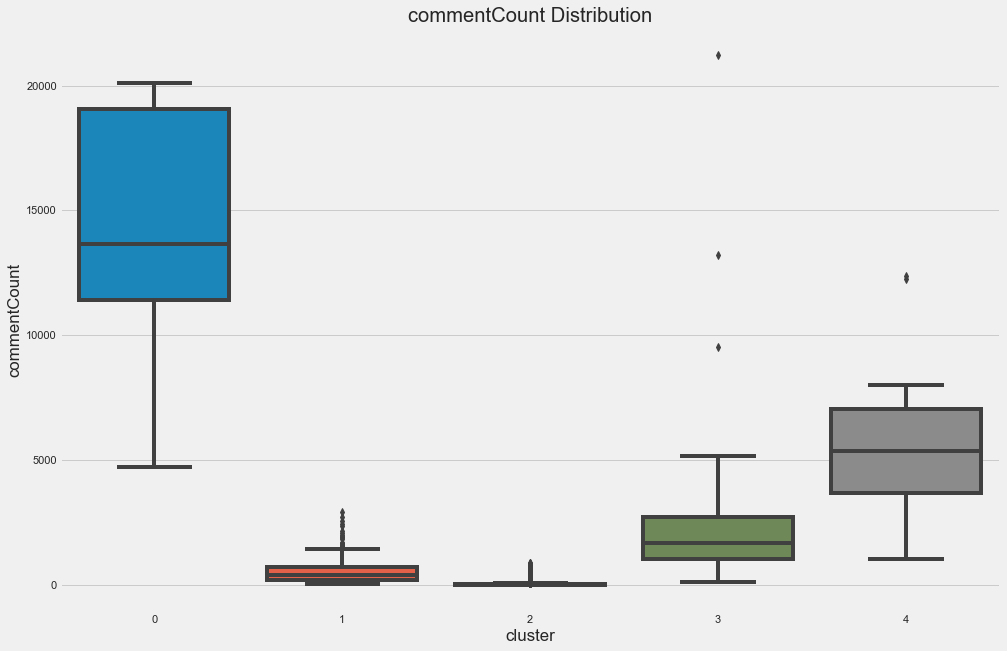

In [47]:
#plot clusters

attributes = ['viewCount', 'likeCount', 'commentCount']

for a in attributes:
    sns.boxplot(data= market, y= a, x= 'cluster')
    plt.title(a+' Distribution')
    plt.show()

In [48]:
# check different clusters properties 
market.groupby('cluster').describe()

videoCategoryId                                                     \
                  count       mean       std   min   25%   50%   75%   max   
cluster                                                                      
0                   9.0  27.111111  0.333333  27.0  27.0  27.0  27.0  28.0   
1                 494.0  27.058704  0.755370  22.0  27.0  27.0  27.0  28.0   
2               12108.0  26.628427  1.975009   1.0  27.0  27.0  27.0  28.0   
3                  78.0  26.884615  1.139387  22.0  27.0  27.0  27.0  28.0   
4                  19.0  26.736842  1.147079  22.0  27.0  27.0  27.0  27.0   

        durationSec                                                         \
              count         mean         std    min     25%    50%     75%   
cluster                                                                      
0               9.0   852.222222  306.852480  466.0  671.00  684.0   975.0   
1             494.0   869.657895  696.195741   27.0  428.25  674.0  1022.0   
2           12108.0   676.627354  664.706799    5.0  237.00  438.0   838.0   
3              78.0   896.653846  549.456989   66.0  600.00  832.0  1084.5   
4              19.0  1040.894737  552.751390  313.0  633.00  977.0  1299.5   

                licensedContent                                    viewCount  \
            max           count mean  std  min  25%  50%  75%  max     count   
cluster                                                                        
0        1444.0             9.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0       9.0   
1        3556.0           494.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0     494.0   
2        3599.0         12108.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   12108.0   
3        3313.0            78.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0      78.0   
4        2650.0            19.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0      19.0   

                                                                       \
                 mean           std        min         25%        50%   
cluster                                                                 
0        9.248069e+06  2.438762e+06  6874129.0  7509317.00  7841739.0   
1        4.428159e+05  2.009002e+05   233299.0   284974.75   379507.0   
2        2.316566e+04  3.932111e+04       11.0     1557.00     5839.5   
3        1.753729e+06  4.896179e+05  1140148.0  1296634.75  1652374.0   
4        4.331052e+06  9.108418e+05  3041780.0  3487330.50  4163114.0   

                                 likeCount                               \
                 75%         max     count           mean           std   
cluster                                                                   
0        11576636.00  13248570.0       9.0  251210.888889  53862.906135   
1          542803.25   1078980.0     494.0    7810.184211   7557.455762   
2           25275.50    232353.0   12108.0     325.532540    719.555912   
3         2144759.75   2951832.0      78.0   40430.538462  34426.197397   
4         5241607.50   5721998.0      19.0  105478.736842  43700.239123   

                                                           dislikeCount  \
              min       25%       50%        75%       max        count   
cluster                                                                   
0        164255.0  204649.0  253769.0  290659.00  319298.0          9.0   
1           200.0    2590.0    5537.0   10483.75   52062.0        494.0   
2             0.0      14.0      69.0     290.00   11096.0      12108.0   
3          2935.0   21581.0   33007.0   48709.25  217059.0         78.0   
4         21952.0   76172.5  118686.0  131216.50  187700.0         19.0   

                                                                              \
                mean          std     min      25%     50%      75%      max   
cluster                                                                        
0        6015.000000  3151.160144  1726.0  3814.00  5663.0  7454.00  12563.0   
1         

In [49]:
market[market['channelTitle']=='Ken Jee']['cluster'].value_counts()
# ken Jee's video is currently in the cluster with the lowest views & like & commentes 
# <- also most common/competitive group of data science channel

2    127
1      1
Name: cluster, dtype: int64

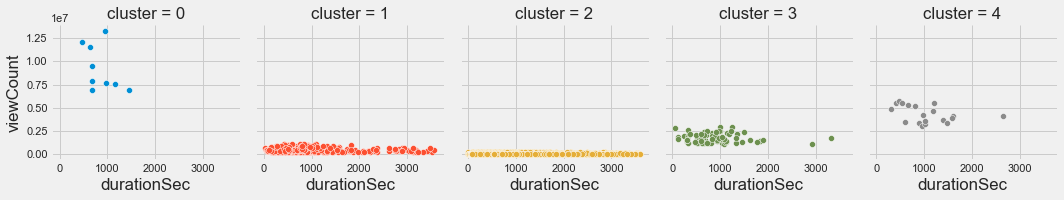

In [50]:
# plot video durationSec for different clusters
g = sns.FacetGrid(market, col="cluster",  hue="cluster")
g.map(sns.scatterplot, "durationSec", "viewCount")
#market.groupby('cluster')['durationSec'].value_counts()

In [51]:
# explore further cluster cluster 2 - the most common cluster
further = market[market['cluster']==2].reset_index(drop=True)
further

,channelId,channelTitle,videoId,publishedAt,publishedAtSQL,videoTitle,videoDescription,videoCategoryId,videoCategoryLabel,duration,durationSec,dimension,definition,caption,thumbnail_maxres,licensedContent,viewCount,likeCount,dislikeCount,favoriteCount,commentCount,cluster
0,UCkndrGoNpUDV-uia6a9jwVg,ExcelIsFun,cAulba1FL8I,2020-07-11T00:12:56Z,11/7/20 0:12,Power Query & DAX Formulas for Advanced Data Modeling to Sort Slicer by PivotTable Values. EMT1678.,"Download Start Excel File: http://excelisfun.net/files/EMT1678Start.xlsm Download Finished Excel File: http://excelisfun.net/files/EMT1678Finished.xlsm Learn how to build a data model with Power Query and DAX Formulas to force a Slicer to Sort by the PivotTable Values. Topics: 1. (00:00) Introduction. 2. (01:00) Concept for Data Model 3. (01:26) Power Query to create Dimension Table and Index Columns, then load to Power Pivot Data Model. See Add Index Column and Merge feature. 4. (03:07) Add Sort Table From Excel to the Data Model. 5. (03:13) Create Automatic Date Table. 6. (03:32) Create Relationships. 7. (03:45) Create Measure with SUM Function. 8. (04:11) Discuss Aggregate Formula vs. Measure & Filter Context.. 9. (04:50) Add Key to Dimension Table to avoid Circular Dependency using Table Properties. 10. (05:09) Create DAX Calculated Column using: a Measure, and Aggregate SUM Function, IF Function, VALUES Function. 11. (05:20) Discuss Content Transition to allow Filter Content into Measure in a Calculated Column. 12. (05:43) Example of Aggregate Function with NO Filter Context. 13. (05:55) Discuss how to get formula to contain two numbers to sort in opposite directions. 14. (07:48) Sort By Feature. 15. (08:20) Create PivotTables and Add Slicer. 16. (09:14) Test. 17. (09:30) Edit Dax Calculated Column. 18. (10:05) Add VBA code to update automatically. 19. (11:06) Summary. 20. (11:39) End Video Links",27.0,Education,PT11M50S,710.0,2d,hd,False,https://i.ytimg.com/vi/cAulba1FL8I/maxresdefault.jpg,1.0,9407.0,443.0,3.0,0.0,88.0,2
1,UCkndrGoNpUDV-uia6a9jwVg,ExcelIsFun,v14i4qSmZTo,2020-05-16T19:43:43Z,16/5/20 19:43,Double OR Logical Tests in SUMIFS Function using FILTER or IF or MMULT. Excel Magic Trick 1669.,"Download Excel File: https://excelisfun.net/files/EMT1669.xlsx Learn how to summarize Book Author Sales Units when there are multiple authors for each book and only Book ID in the Sales Table, not Author ID. Learn how to create OR Logical Tests in a number of different ways. Learn how to use FILTER, IF and MMULT to create the OR Logical Test Criteria inside the SUMIFS Function. Topics: 1. (00:01) Introduction and Overview of logic for formula 2. (01:00) Formula #1: FILTER, SUMIFS, SUM and Direct Array OR Logical Test calculations. 3. (04:19) Formula #2: IF , SUMIFS, SUMPRODUCT and Direct Array OR Logical Test calculations. 4. (05:03) Formula #3: FILTER, MMULT, COLUMN, SUMIFS, SUM and Direct Array OR Logical Test calculations. 5. (05:39) Summary and End Video Links",27.0,Education,PT6M8S,368.0,2d,hd,False,https://i.ytimg.com/vi/v14i4qSmZTo/maxresdefault.jpg,1.0,10060.0,527.0,3.0,0.0,115.0,2
2,UCkndrGoNpUDV-uia6a9jwVg,ExcelIsFun,lHLPOO6UQDE,2020-05-09T21:17:19Z,9/5/20 21:17,Combine Two Excel Files Into PivotTable Report - Excel Magic Trick 1667,"Download Excel Start File: https://excelisfun.net/files/EMT1667Start.xlsx Download Data: https://excelisfun.net/files/EMT1667Files.zip Download Excel https://excelisfun.net/files/EMT1667Finished.xlsx Learn how to Import data from two different Excel Files directly into a PivotTable Report. Topics: 1. (00:01) Introduction. 2. (00:13) Why we want to use 2 separate Load Only Imports, rather than From Folder feature. 3. (00:43) Look at Data Sets. 4. (00:59) Look at Finished Report. 5. (01:22) Problem with Copy and Paste. 6. (01:51) Import File 1. 7. (02:33) Verify Column Names and Column Data Types. 8. (03:35) Load as “Only Create Connection”. 9. (03:59) Repeat Steps for File 2. 10. (04:14) Combine Two Tables into One Table. Also knows as Ap

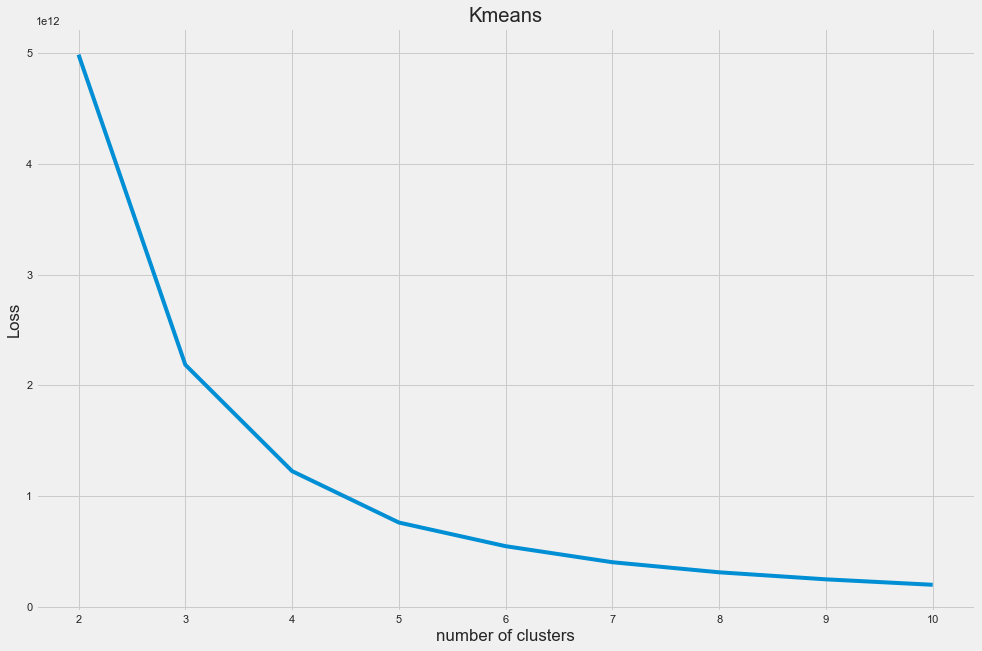

In [52]:
X = further[['viewCount', 'likeCount', 'commentCount']]
#features.dropna(inplace=True)

N = range(2,11)
score = []
for n in N:
    model = KMeans(n_clusters= n, 
                  max_iter= 200,
                  n_init = 10)
    model = model.fit(X)
    score.append(model.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(N, score)
plt.xlabel('number of clusters')
plt.ylabel('Loss')
plt.title('Kmeans')
plt.show()
    
# optimal number of clusters is 4 

In [53]:
# cluster the videos 

km = KMeans(
    n_clusters=4, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=2022
)
cluster1 = km.fit_predict(X)

In [54]:
further= pd.concat([further, pd.DataFrame(cluster1)], axis=1)
further.drop(['cluster'], axis = 1, inplace=True)
further.rename(columns= {0: 'cluster'}, inplace=True)
further

,channelId,channelTitle,videoId,publishedAt,publishedAtSQL,videoTitle,videoDescription,videoCategoryId,videoCategoryLabel,duration,durationSec,dimension,definition,caption,thumbnail_maxres,licensedContent,viewCount,likeCount,dislikeCount,favoriteCount,commentCount,cluster
0,UCkndrGoNpUDV-uia6a9jwVg,ExcelIsFun,cAulba1FL8I,2020-07-11T00:12:56Z,11/7/20 0:12,Power Query & DAX Formulas for Advanced Data Modeling to Sort Slicer by PivotTable Values. EMT1678.,"Download Start Excel File: http://excelisfun.net/files/EMT1678Start.xlsm Download Finished Excel File: http://excelisfun.net/files/EMT1678Finished.xlsm Learn how to build a data model with Power Query and DAX Formulas to force a Slicer to Sort by the PivotTable Values. Topics: 1. (00:00) Introduction. 2. (01:00) Concept for Data Model 3. (01:26) Power Query to create Dimension Table and Index Columns, then load to Power Pivot Data Model. See Add Index Column and Merge feature. 4. (03:07) Add Sort Table From Excel to the Data Model. 5. (03:13) Create Automatic Date Table. 6. (03:32) Create Relationships. 7. (03:45) Create Measure with SUM Function. 8. (04:11) Discuss Aggregate Formula vs. Measure & Filter Context.. 9. (04:50) Add Key to Dimension Table to avoid Circular Dependency using Table Properties. 10. (05:09) Create DAX Calculated Column using: a Measure, and Aggregate SUM Function, IF Function, VALUES Function. 11. (05:20) Discuss Content Transition to allow Filter Content into Measure in a Calculated Column. 12. (05:43) Example of Aggregate Function with NO Filter Context. 13. (05:55) Discuss how to get formula to contain two numbers to sort in opposite directions. 14. (07:48) Sort By Feature. 15. (08:20) Create PivotTables and Add Slicer. 16. (09:14) Test. 17. (09:30) Edit Dax Calculated Column. 18. (10:05) Add VBA code to update automatically. 19. (11:06) Summary. 20. (11:39) End Video Links",27.0,Education,PT11M50S,710.0,2d,hd,False,https://i.ytimg.com/vi/cAulba1FL8I/maxresdefault.jpg,1.0,9407.0,443.0,3.0,0.0,88.0,3
1,UCkndrGoNpUDV-uia6a9jwVg,ExcelIsFun,v14i4qSmZTo,2020-05-16T19:43:43Z,16/5/20 19:43,Double OR Logical Tests in SUMIFS Function using FILTER or IF or MMULT. Excel Magic Trick 1669.,"Download Excel File: https://excelisfun.net/files/EMT1669.xlsx Learn how to summarize Book Author Sales Units when there are multiple authors for each book and only Book ID in the Sales Table, not Author ID. Learn how to create OR Logical Tests in a number of different ways. Learn how to use FILTER, IF and MMULT to create the OR Logical Test Criteria inside the SUMIFS Function. Topics: 1. (00:01) Introduction and Overview of logic for formula 2. (01:00) Formula #1: FILTER, SUMIFS, SUM and Direct Array OR Logical Test calculations. 3. (04:19) Formula #2: IF , SUMIFS, SUMPRODUCT and Direct Array OR Logical Test calculations. 4. (05:03) Formula #3: FILTER, MMULT, COLUMN, SUMIFS, SUM and Direct Array OR Logical Test calculations. 5. (05:39) Summary and End Video Links",27.0,Education,PT6M8S,368.0,2d,hd,False,https://i.ytimg.com/vi/v14i4qSmZTo/maxresdefault.jpg,1.0,10060.0,527.0,3.0,0.0,115.0,3
2,UCkndrGoNpUDV-uia6a9jwVg,ExcelIsFun,lHLPOO6UQDE,2020-05-09T21:17:19Z,9/5/20 21:17,Combine Two Excel Files Into PivotTable Report - Excel Magic Trick 1667,"Download Excel Start File: https://excelisfun.net/files/EMT1667Start.xlsx Download Data: https://excelisfun.net/files/EMT1667Files.zip Download Excel https://excelisfun.net/files/EMT1667Finished.xlsx Learn how to Import data from two different Excel Files directly into a PivotTable Report. Topics: 1. (00:01) Introduction. 2. (00:13) Why we want to use 2 separate Load Only Imports, rather than From Folder feature. 3. (00:43) Look at Data Sets. 4. (00:59) Look at Finished Report. 5. (01:22) Problem with Copy and Paste. 6. (01:51) Import File 1. 7. (02:33) Verify Column Names and Column Data Types. 8. (03:35) Load as “Only Create Connection”. 9. (03:59) Repeat Steps for File 2. 10. (04:14) Combine Two Tables into One Table. Also knows as Ap

In [55]:
# look at size of clusters
further['cluster'] = further['cluster'].astype('category')
#sns.histplot(data= further, x= 'cluster')
further['cluster'].value_counts()

3    8834
1    1964
0     888
2     422
Name: cluster, dtype: int64

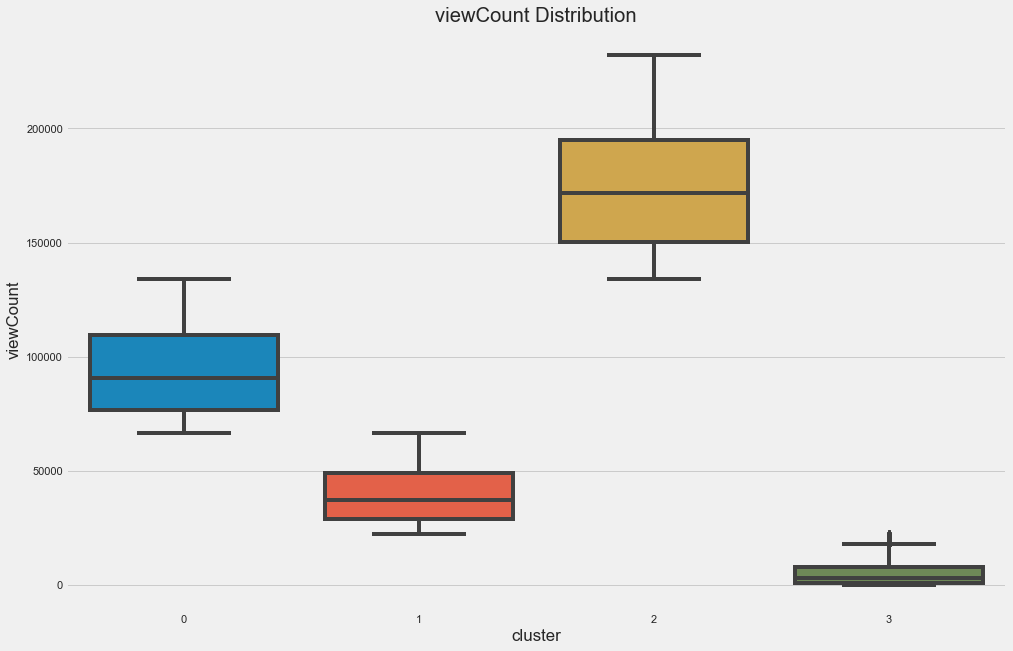

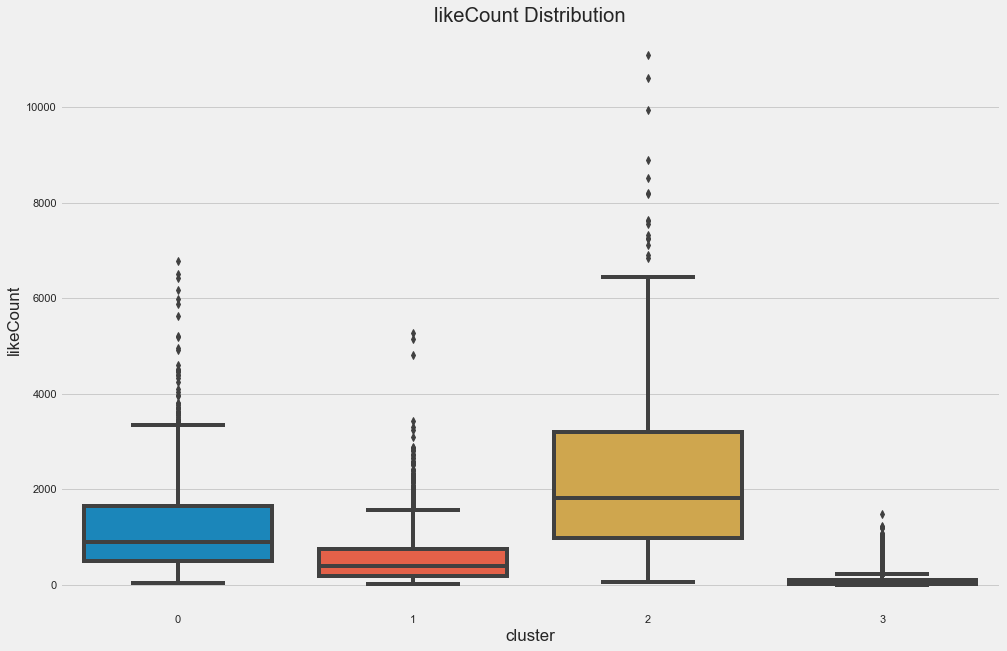

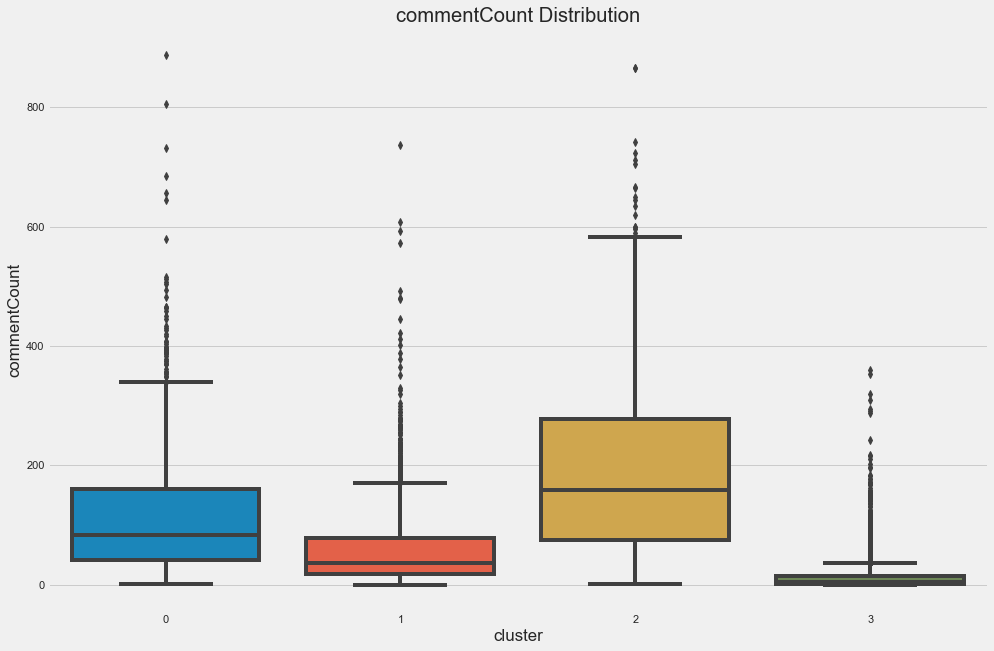

In [56]:
# plot clusters
for a in attributes:
    sns.boxplot(data= further, y= a, x= 'cluster')
    plt.title(a+' Distribution')
    plt.show()

In [57]:
further[further['channelTitle']=='Ken Jee']['cluster'].value_counts()

3    116
1      8
0      2
2      1
Name: cluster, dtype: int64

In [58]:
# check different clusters properties 
further.groupby('cluster').describe()

videoCategoryId                                                     \
                  count       mean       std   min   25%   50%   75%   max   
cluster                                                                      
0                 888.0  26.879505  1.368063   2.0  27.0  27.0  27.0  28.0   
1                1964.0  26.853360  1.474139   1.0  27.0  27.0  27.0  28.0   
2                 422.0  26.914692  1.090805  22.0  27.0  27.0  27.0  28.0   
3                8834.0  26.539506  2.142303   1.0  26.0  27.0  27.0  28.0   

        durationSec                                                      \
              count        mean         std   min    25%    50%     75%   
cluster                                                                   
0             888.0  718.693694  563.316054  64.0  364.0  562.0  860.50   
1            1964.0  701.675662  570.379303  17.0  312.0  531.0  866.25   
2             422.0  750.289100  581.651398   8.0  377.0  587.0  885.75   
3            8834.0  663.311184  696.102828   5.0  208.0  387.5  819.75   

                licensedContent                                    viewCount  \
            max           count mean  std  min  25%  50%  75%  max     count   
cluster                                                                        
0        3363.0           888.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0     888.0   
1        3518.0          1964.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0    1964.0   
2        3566.0           422.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0     422.0   
3        3599.0          8834.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0    8834.0   

                                                                     \
                  mean           std       min        25%       50%   
cluster                                                               
0         93903.645270  19323.100894   66710.0   76444.50   90537.0   
1         39669.017312  12503.992187   22360.0   28752.75   37368.0   
2        174428.338863  27283.569567  134072.0  150395.00  171514.5   
3          5160.138556   5527.651246      11.0     977.50    2945.0   

                             likeCount                                  \
               75%       max     count         mean          std   min   
cluster                                                                  
0        109595.00  133973.0     888.0  1228.488739  1052.465220  31.0   
1         49181.50   66647.0    1964.0   562.277495   549.531843   9.0   
2        194824.25  232353.0     422.0  2356.582938  1850.445350  49.0   
3          7700.75   22347.0    8834.0    85.109690   137.132010   0.0   

                                          dislikeCount                        \
            25%     50%      75%      max        count       mean        std   
cluster                                                                        
0        494.50   892.0  1642.50   6780.0        888.0  29.432432  28.165719   
1        185.00   385.5   741.25   5261.0       1964.0  13.543279  15.362114   
2        970.75  1807.0  3190.25  11096.0        422.0  60.585308  49.547847   
3          8.00    33.0    97.00   1479.0       8834.0   2.207720   5.822654   

                                       favoriteCount                           \
         min    25%   50%   75%    max         count mean  std  min  25%  50%   
cluster                                                                         
0        0.0  14.00  22.0  35.0  344.0         888.0  0.0  0.0  0.0  0.0  0.0   
1        0.0   5.00   9.0  16.0  226.0        1964.0  0.0  0.0  0.0  0.0  0.0   
2        4.0  27.25  46.0  75.0  345.0         422.0  0.0  0.0  0.0  0.0  0.0   
3        0.0   0.00   1.0   3.0  375.0        8834.0  0.0  0.0  0.0  0.0  0.0   

                  commentCount                                             \
         75%  max        count        mean         std  min    25%    50%   
cluster                                                                   

In [59]:
ken= market[market['channelTitle']=='Ken Jee']
ken.describe()

,videoCategoryId,durationSec,licensedContent,viewCount,likeCount,dislikeCount,favoriteCount,commentCount,cluster
count,128.000000,128.000000,128.0,128.000000,128.000000,128.000000,128.0,128.000000,128.000000
mean,23.054688,806.695312,1.0,13773.679688,607.375000,12.203125,0.0,71.484375,1.992188
std,3.028236,706.530021,0.0,51727.712682,2186.831419,45.570636,0.0,121.422344,0.088388
min,17.000000,51.000000,1.0,280.000000,8.000000,0.000000,0.0,0.000000,1.000000
25%,22.000000,375.000000,1.0,1551.000000,76.750000,0.000000,0.0,13.750000,2.000000
50%,22.000000,552.000000,1.0,3483.000000,158.000000,2.000000,0.0,40.000000,2.000000
75%,24.750000,892.000000,1.0,10005.000000,458.250000,6.000000,0.0,87.000000,2.000000
max,28.000000,3493.000000,1.0,555813.000000,21637.000000,448.000000,0.0,1181.000000,2.000000


In [60]:
# take cluster 0, 1, 2 as good videos that Ken Jee can learn from 
good= further[(further['cluster']==0)|(further['cluster']==1)|(further['cluster']==2)].reset_index(drop=True)
good.describe()

,videoCategoryId,durationSec,licensedContent,viewCount,likeCount,dislikeCount,favoriteCount,commentCount
count,3274.000000,3274.000000,3274.0,3274.000000,3274.000000,3274.000000,3274.0,3274.000000
mean,26.868357,712.557422,1.0,71748.670128,974.248320,23.916310,0.0,95.112095
std,1.401438,569.998972,0.0,48997.644681,1134.680261,30.306738,0.0,110.087089
min,1.000000,8.000000,1.0,22360.000000,9.000000,0.000000,0.0,0.000000
25%,27.000000,332.000000,1.0,34271.000000,263.000000,7.000000,0.0,25.250000
50%,27.000000,551.000000,1.0,54194.500000,600.500000,14.000000,0.0,55.000000
75%,27.000000,867.000000,1.0,94032.000000,1227.500000,28.000000,0.0,122.000000
max,28.000000,3566.000000,1.0,232353.000000,11096.000000,345.000000,0.0,888.000000


In [61]:
good

,channelId,channelTitle,videoId,publishedAt,publishedAtSQL,videoTitle,videoDescription,videoCategoryId,videoCategoryLabel,duration,durationSec,dimension,definition,caption,thumbnail_maxres,licensedContent,viewCount,likeCount,dislikeCount,favoriteCount,commentCount,cluster
0,UCkndrGoNpUDV-uia6a9jwVg,ExcelIsFun,wAlLqKFu9Tw,2019-03-22T07:19:53Z,22/3/19 7:19,"E-DAB 08: Power Pivot: Big Data, Data Modeling, DAX & Dashboards","Download all files to follow along with video and do homework is zipped folder here: https://people.highline.edu/mgirvin/AllClasses/348/MSPTDA/Content/EDAB/DownloadFilesForEDAB08.zip To download individual files, visit class web site here: https://people.highline.edu/mgirvin/AllClasses/348/MSPTDA/Content/EDAB/EDAB.htm This video is an introduction to Data Modeling in Excel Power Pivot to create reports and Dashboards. Learn how to use Power Query to import SQL Big Data into the Data Model. Learn how to build DAX Formulas. Lean how to create an entire Data Model and then build Data Model PivotTables and Data Model Charts. This class : Data Analysis & Business Intelligence Made Easy with Excel Power Tools - Excel Data Analysis Basics = E-DAB Class – Sponsored by YouTube and taught by Mike Girvin, Highline College Instructor, Microsoft Excel MVP and founder of the excelisfun channel at YouTube. This is a free educational resource for people how want to learn about the Basics of Data Analysis and Business Intelligence using Microsoft Power Tools such as, PivotTables, Power Query, Power Pivot, Power BI Desktop and more. Topics: 1. (00:15) Introduction & Over view of entire Big Data & DAX Project. 2. (02:20) Download Files. 3. (02:57) What is a Data Model PivotTable and why Power Pivot is called “Power Pivot” 4. (04:03) Differences Between Standard PivotTable & Data Model PivotTable 5. (06:20) Average Daily Reve Example and why DAX is Easier than Standard PivotTable. 6. (07:33) Choice between: Standard PivotTable & Data Model PivotTable 7. (08:18) What is a SQL Database? 8. (09:06) Import Big Data from SQL Database using Power Query 9. (11:10) Load SQL Tables into Columnar Database in Power Pivot’s Data Model 10. (11:38) How to get into the Data Model. Into to Data Model. 11. (13:00) Create Relationships in Design View 12. (14:17) What is a Date Table? Create Date Table. 13. (18:40) Hide Column From Client Tool 14. (19:30) Overview of DAX Formulas 15. (20:58) DAX Calculated Column for Line Revenue 16. (23:42) Row Context 17. (25:55) DAX Measure to add Calculated Column using SUM 18. (27:07) SUMX DAX Measure to calculate Total Revenue without a Calculated Column. 19. (29:37) Compare and contrast Calculated Column and Measures. 20. (31:18) Create Data Model PivotTable 21. (33:22) Filter Context 22. (35:03) Create More DAX Formulas: Total COGS, Gross Profit and Percent Gross Profit. 23. (37:54) Create Dashboard for Gross Profit. 24. (40:20) Create Running Total and Average Daily Revenue DAX Measures and Final Data Model PivotTable. 25. (43:40) Summary",27.0,Education,PT44M43S,2683.0,2d,hd,True,https://i.ytimg.com/vi/wAlLqKFu9Tw/maxresdefault.jpg,1.0,25827.0,1008.0,4.0,0.0,221.0,1
1,UCkndrGoNpUDV-uia6a9jwVg,ExcelIsFun,MH2g-8191V8,2019-03-16T05:46:35Z,16/3/19 5:46,"E-DAB 07: Data Modeling: VLOOKUP, Power Query or Power Pivot?","Download all files to follow along with video and do homework is zipped folder here: https://people.highline.edu/mgirvin/AllClasses/348/MSPTDA/Content/EDAB/DownloadFilesForEDAB07.zip To download individual files, visit class web site here: https://people.highline.edu/mgirvin/AllClasses/348/MSPTDA/Content/EDAB/EDAB.htm This video teaches how to take raw data and perform Data Modeling so that you have the correct set of Proper Data Sets that allow you to efficiently and effectively perform Data Analysis. See how to Data Model with: 1) Spreadsheet formulas, 2) Power Query, and 3) Power Pivot’s Relationship feature and Implicit Measures. This class : Data Analysis & Business Intelligence Made Easy wit

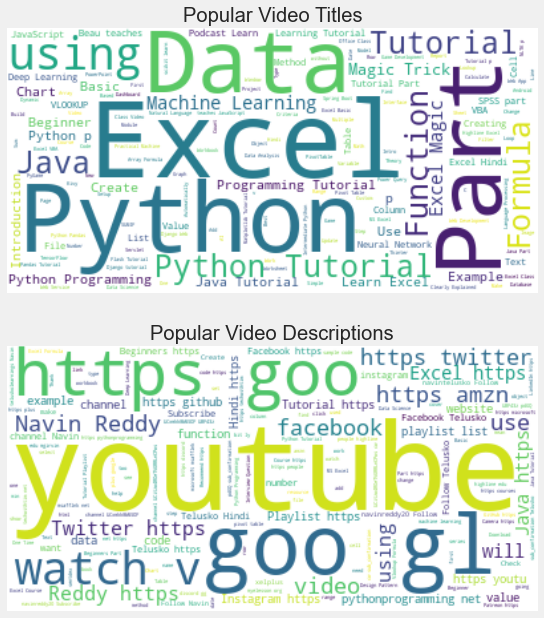

In [62]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

text1 = ' '.join(str(text) for text in good['videoTitle'])
wordcloud1 = WordCloud(background_color='white', stopwords=STOPWORDS, relative_scaling= 0.1
                      ).generate(text1)

# generate wordcloud2 for reviews where star == 5
text2 = ' '.join(str(text) for text in good['videoDescription'])
wordcloud2 = WordCloud(background_color='white', stopwords=STOPWORDS, relative_scaling= 0.1
                      ).generate(text2)

# display both wordclouds 
plt.figure(figsize= (20, 10))

plt.subplot(211)
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.title("Popular Video Titles")

plt.subplot(212)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.title("Popular Video Descriptions")

plt.show()


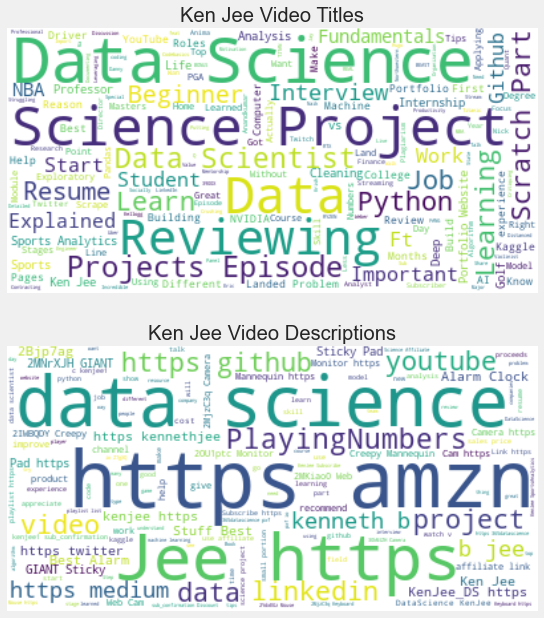

In [63]:
# plot Ken Jee's videos
ken= market[market['channelTitle']=='Ken Jee']

text1 = ' '.join(str(text) for text in ken['videoTitle'])
wordcloud1 = WordCloud(background_color='white', stopwords=STOPWORDS, relative_scaling= 0.2
                      ).generate(text1)

# generate wordcloud2 for reviews where star == 5
text2 = ' '.join(str(text) for text in ken['videoDescription'])
wordcloud2 = WordCloud(background_color='white', stopwords=STOPWORDS, relative_scaling= 0.2
                      ).generate(text2)

# display both wordclouds 
plt.figure(figsize= (20, 10))

plt.subplot(211)
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.title('Ken Jee Video Titles')

plt.subplot(212)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.title("Ken Jee Video Descriptions")

plt.show()

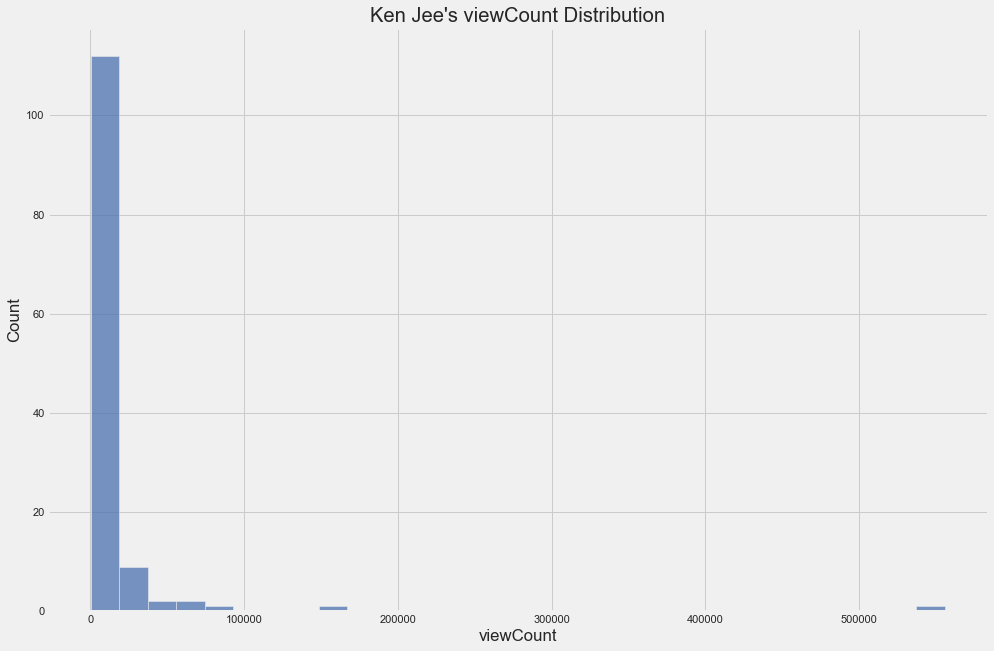

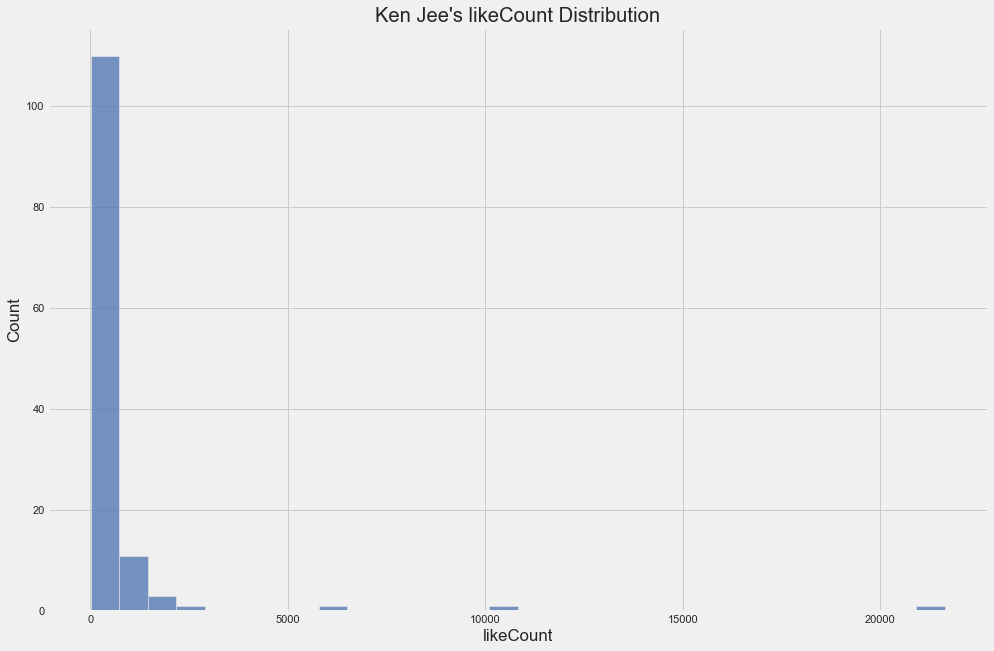

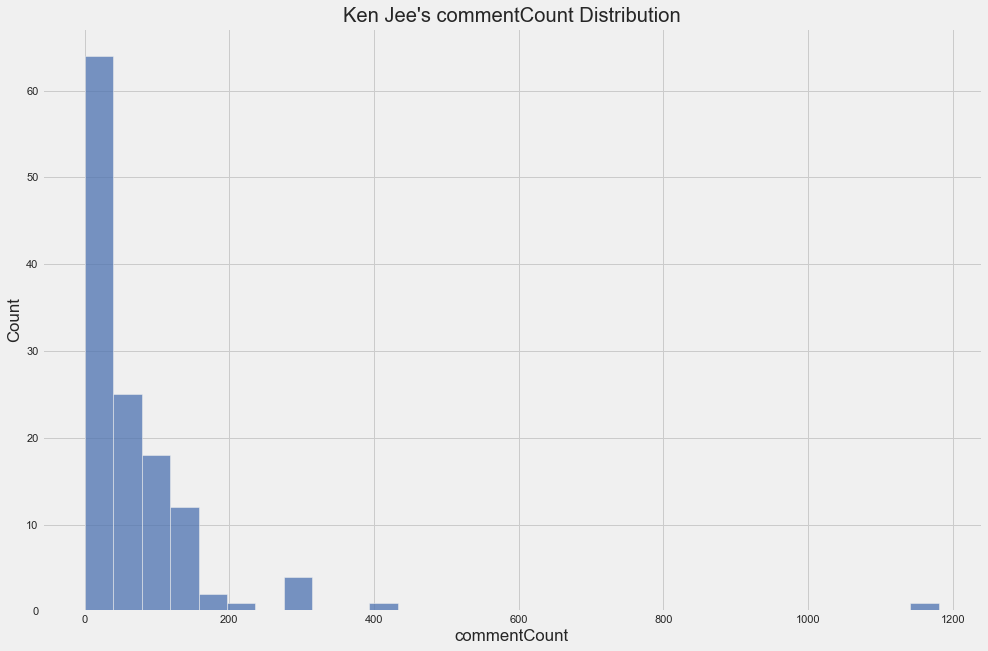

In [64]:
# plot Ken Jee's videos
ken= market[market['channelTitle']=='Ken Jee']

for a in attributes:
    sns.histplot(x= ken[a], bins= 30)
    plt.title("Ken Jee's "+a+' Distribution')
    plt.show()

    # look at min max mean median etc 

# Feature Analysis

Importing Packages

In [65]:
import pandas as pd
from textblob import TextBlob
import numpy as np
from sklearn.preprocessing import minmax_scale

Comments can help to promote a video by leading back to another video featuring similar content, or they can show other viewers that the content in the video that they're currently watching (or loading) is worth their time, encouraging their fellow viewers to stay, thereby increasing the channels watch time as a result.

In [66]:
user_data = pd.read_csv('All_Comments_Final.csv')
video_data = pd.read_csv('Aggregated_Metrics_By_Video.csv')

In [67]:
user_data.head(3)

,Comments,Comment_ID,Reply_Count,Like_Count,Date,VidId,user_ID
0,"Thanks for this video Ken.\n\nI decided to go into Tech in 2018 by learning web development. Learnt a bit of HTML, CSS and Javascript. My goals has since evolved through this period as I got interested in python programming and Data science.\n\nMy current interest now tends towards deep learning and AI\n\nInteresting my knowledge of front end web development will be very helpful in web scraping.",UgxFZTIzC4UPyhhX_PZ4AaABAg,0,0,2022-01-22T08:13:29Z,xpIFS6jZbe8,user_981
1,"Hello ken jee!!! I'm doing a graduation on Computer Science and i really keen to learn Data Science. From where should i start? learning Python basics? If you have any resources of learning Python, could you help me providing the link? To be honest my excitement to learning data science get on the top notch after watching your this video. 😄",Ugx3IYuAufhb932GYQx4AaABAg,0,0,2022-01-22T01:09:46Z,xpIFS6jZbe8,user_213
2,"Thanks for this video, man. So useful. I'll meet you when I'm a Senior Lead Data Scientist at the Company I work for",UgyhwwoK24arzRt1mud4AaABAg,0,0,2022-01-21T23:59:05Z,rEWPqw6rMGI,user_1065


In [68]:
video_data.head(3)

,Video,Video title,Video pub­lish time,Com­ments ad­ded,Shares,Dis­likes,Likes,Sub­scribers lost,Sub­scribers gained,RPM (USD),CPM (USD),Av­er­age per­cent­age viewed (%),Av­er­age view dur­a­tion,Views,Watch time (hours),Sub­scribers,Your es­tim­ated rev­en­ue (USD),Im­pres­sions,Im­pres­sions click-through rate (%)
0,Total,NaN,NaN,14197,39640,3902,225021,45790,229241,5.276,11.990,26.61,0:03:25,5568487,317602.3536,183451,29068.652,100954064,3.16
1,4OZip0cgOho,How I Would Learn Data Science (If I Had to Start Over),"May 8, 2020",907,9583,942,46903,451,46904,6.353,12.835,36.65,0:03:09,1253559,65850.7042,46453,7959.533,26498799,3.14
2,78LjdAAw0wA,100K Channel Update + AMA Stream!,"Nov 12, 2020",412,4,4,130,15,12,2.668,6.259,6.26,0:05:14,2291,200.2966,-3,6.113,188318,0.72


Including the sentiment component in the user data based on the comments and aggregating the features

In [69]:
user_data['sentiment'] = user_data.Comments.apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [70]:
user_features = user_data.groupby(['VidId']).agg({'user_ID':'count','Reply_Count':'sum','Like_Count':'sum','sentiment':'mean'}).sort_values(['sentiment'],ascending=False).reset_index()

Filtering only the features and checking for equality between video dataset videos and user dataset videos

In [71]:
video_features = video_data[['Video','Sub­scribers gained','Shares','Likes','Your es­tim­ated rev­en­ue (USD)']].iloc[1:]

In [72]:
len(video_features.sort_values('Video'))==len(user_features.sort_values('VidId'))

False

In [73]:
video_features.Video = video_features.Video.astype(str)
user_features.VidId = user_features.VidId.astype(str)
video_features.Video = video_features.Video.str.replace(' ','')
user_features.VidId = user_features.VidId.str.replace(' ','')

Finding the extra video in video dataset and removing it

In [74]:
merged_df = video_features.merge(user_features,how='outer',left_on='Video',right_on='VidId',indicator=True)
merged_df[merged_df['_merge']=='left_only']

,Video,Sub­scribers gained,Shares,Likes,Your es­tim­ated rev­en­ue (USD),VidId,user_ID,Reply_Count,Like_Count,sentiment,_merge
222,5p73cIRYCZg,0,2,1,0.003,NaN,NaN,NaN,NaN,NaN,left_only


In [75]:
merged_df[merged_df['_merge']=='right_only']

,Video,Sub­scribers gained,Shares,Likes,Your es­tim­ated rev­en­ue (USD),VidId,user_ID,Reply_Count,Like_Count,sentiment,_merge


In [76]:
video_features = video_features[video_features['Video']!='5p73cIRYCZg']

In [77]:
len(video_features.sort_values('Video'))==len(user_features.sort_values('VidId'))

True

Equating features of both user and video datasets to create equatable matrices contianing features Engagement, Support, Likes and Impact

In [78]:
v_features = video_features.sort_values('Video').drop('Video',axis=1)
v_features.rename(columns = {"Sub­scribers gained":"Engagement",
                                 "Shares":"Support",
                                 "Your es­tim­ated rev­en­ue (USD)":"Impact"},inplace=True)

In [79]:
user_features = user_features.sort_values('VidId').drop('VidId',axis=1)
user_features.rename(columns = {"user_ID":"Engagement",
                                "Reply_Count":"Support",
                                "Like_Count":"Likes",
                                "sentiment":"Impact"},inplace=True)

Converting datasets to matrices for dot product

In [80]:
V = v_features.to_numpy()
shape = V.shape
V_scaled = minmax_scale(V.ravel(), feature_range=(0,100)).reshape(shape)

In [81]:
V_scaled

array([[2.34521576e-02, 1.70561146e-02, 2.92085963e-01, 1.13380522e-02],
       [7.80317244e-01, 1.89749275e-01, 1.22804025e+00, 2.06238274e-01],
       [2.34521576e-02, 1.06600716e-02, 1.40712946e-01, 9.25720621e-03],
       [2.32389562e-01, 1.70561146e-01, 1.47322190e+00, 1.14440133e-01],
       [5.75643868e-02, 8.31485588e-02, 5.05287396e-01, 3.83869180e-02],
       [3.83762579e-02, 9.16766161e-02, 5.69247825e-01, 3.52827051e-02],
       [2.55841719e-02, 1.70561146e-02, 1.98277332e-01, 1.26407129e-02],
       [4.47723009e-02, 4.05082722e-02, 4.66911138e-01, 5.37779294e-02],
       [3.53914378e-01, 8.10165444e-02, 8.25089545e-01, 8.88282449e-02],
       [1.31545284e+00, 5.05287396e-01, 3.35365854e+00, 4.42431349e-01],
       [4.05082722e-02, 3.62442436e-02, 2.53709705e-01, 6.61798567e-02],
       [4.05082722e-02, 6.39604298e-03, 1.40712946e-01, 1.77916596e-02],
       [2.63090568e+00, 1.24509637e+00, 5.92273580e+00, 8.36235716e-01],
       [5.75643868e-02, 2.34521576e-02, 2.79293877e

In [82]:
P = user_features.to_numpy()
shape = P.shape
P_scaled = minmax_scale(P.ravel(), feature_range=(0,100)).reshape(shape)

In [83]:
P_scaled

array([[7.24637681e-01, 8.82167612e-01, 1.13421550e+00, 6.09190104e-03],
       [1.19722747e+00, 1.76433522e+00, 5.13547574e+00, 4.83373465e-03],
       [2.83553875e-01, 2.83553875e-01, 1.89035917e-01, 3.99338448e-03],
       [2.20541903e+00, 2.42596093e+00, 3.33963453e+00, 1.13803897e-02],
       [8.50661626e-01, 1.03969754e+00, 1.89035917e+00, 9.41824780e-03],
       [1.03969754e+00, 8.82167612e-01, 2.11090107e+00, 6.65507936e-03],
       [4.09577820e-01, 5.35601764e-01, 1.07120353e+00, 5.58432489e-03],
       [8.82167612e-01, 1.10270951e+00, 1.38626339e+00, 6.60028307e-03],
       [2.83553875e-01, 3.15059861e-01, 4.41083806e-01, 1.25549896e-02],
       [1.13421550e+00, 1.41776938e+00, 2.39445495e+00, 8.59870252e-03],
       [8.50661626e-01, 1.10270951e+00, 9.76685570e-01, 5.67651300e-03],
       [9.45179584e-02, 9.45179584e-02, 9.45179584e-02, 1.23923545e-02],
       [2.70951481e+00, 3.02457467e+00, 5.19848771e+00, 9.83613931e-03],
       [6.30119723e-01, 9.45179584e-01, 1.22873346e

Perform dot product between both matrices containing comment section user features and corresponding video features

In [84]:
P_t = P_scaled / np.sum(P_scaled,axis = 1).reshape(222,1)

M = P_t.dot(V_scaled.transpose())

print(M)

[[0.13228368 0.77425168 0.06772692 ... 1.20659821 0.50981127 2.91476001]
 [0.19232906 0.93516242 0.09498523 ... 1.38454816 0.67569731 3.82527673]
 [0.08780823 0.66834451 0.04776694 ... 1.06865818 0.39118065 2.26828295]
 ...
 [0.08355244 0.62043405 0.0452022  ... 1.07291387 0.36776466 2.12693891]
 [0.15723977 0.83208466 0.07890052 ... 1.28339752 0.57593082 3.27396862]
 [0.17813393 0.89836571 0.08856232 ... 1.34234465 0.6368574  3.61270356]]


Find the count of the maximum occurring index value containing the highest rated features (corresponding to the video that has the highest dot product of features)

In [85]:
unique, counts = np.unique(np.argmax(M,axis = 1), return_counts=True)
# np.argmax(M,axis = 1)
print(dict(zip(unique, counts)))

{27: 222}


V_Scaled's 27th row (before transpose) is the one that is multiplied with every row of P_t.

In [86]:
video_features.iloc[171]

Video                               sICJ6a2wX5g
Sub­scribers gained                           6
Shares                                        8
Likes                                       184
Your es­tim­ated rev­en­ue (USD)          2.917
Name: 172, dtype: object

In [87]:
pd.set_option('display.max_colwidth', None)
video_data[video_data['Video']=='fhi4dOhmW-g']['Video title']

28    Data Science Project from Scratch - Part 3 (Data Cleaning)
Name: Video title, dtype: object

Therefore, Data Science Project from Scratch - Part 3 (Data Cleaning) is the video containing the highest dot product of scaled score of features based on the current data and should be kept as the feature video for Ken Jee's youtube channel